In [1]:
from astropy.io import fits
from astropy.wcs import WCS
from glob import glob
import numpy as np
import pandas as pd

from scipy.optimize import minimize 
%matplotlib notebook
import matplotlib.pyplot as plt
from copy import deepcopy
from astropy.modeling import models, fitting
from astropy.stats import sigma_clipped_stats
import sys
sys.path.append('../../src/scenes/')
from correct_saturation import saturated_stars,mask_rad_func
from correct_saturation_old import saturated_stars_old
from pad_skycell import pad_skycell
from ps1_data_handler import ps1_data
from tools import _get_bsc, _get_gaia

import warnings
# nuke warnings because sigma clip is extremely annoying 
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

from copy import deepcopy

from scipy.signal import fftconvolve

In [2]:
from process_ps1 import combine_ps1

In [3]:
datapath = '/Users/rri38/Documents/work/code/SynDiff/development/data/ps1_skycell/'
catpath = '/Users/rri38/Documents/work/code/SynDiff/development/data/catalogs/s20ccd1'
savepath = './thing/'
skycells = '../SkyCells/Sector020/skycell_s20_c1.csv'
combine_ps1(datapath=datapath,skycells=skycells,catalog_path=catpath,savepath=savepath,verbose=1,overwrite=True)

./thing/
Starting field rings.v3.skycell.2247.045

Traceback (most recent call last):
  File "/Users/rri38/Documents/work/code/SynDiff/development/ps1_to_convolved/../../src/scenes/process_ps1.py", line 105, in _process
    pad = pad_skycell(ps1=ps1,skycells=self.skycells,datapath=self.datapath)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/rri38/Documents/work/code/SynDiff/development/ps1_to_convolved/../../src/scenes/pad_skycell.py", line 40, in __init__
    self.run()
  File "/Users/rri38/Documents/work/code/SynDiff/development/ps1_to_convolved/../../src/scenes/pad_skycell.py", line 56, in run
    self._pad_sides()
  File "/Users/rri38/Documents/work/code/SynDiff/development/ps1_to_convolved/../../src/scenes/pad_skycell.py", line 145, in _pad_sides
    buff = hdul[j].data
           ^^^^^^^^^^^^
  File "/Users/rri38/miniconda3/lib/python3.12/site-packages/astropy/utils/decorators.py", line 836, in __get__
    val = self.fget(obj)
       

KeyboardInterrupt: 

In [65]:
from astropy.coordinates import SkyCoord, Angle

In [76]:
_get_gaia(c,8.5)

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,TYC2,URAT1,AllWISE,APASS9,GSC23,RAVE5,_2MASS,RAVE6,RAJ2000,DEJ2000
0,116.867846,37.002228,895084825303358720,0.0129,0.0093,1.7094,0.0148,2.761,-0.275,0.016,...,,URAT1-636171154,J074728.28+370008.0,6207529,N8RB000222,,07472828+3700081,,116.867847,37.002240
1,116.688488,37.036666,895088574810428416,0.0124,0.0099,0.9752,0.0148,7.838,-6.176,0.015,...,,URAT1-636171029,J074645.24+370212.0,6207550,N8RB000207,,07464524+3702120,,116.688522,37.036687
2,116.717080,37.032359,895088643529904512,0.0158,0.0130,0.9062,0.0185,7.883,-5.314,0.019,...,,URAT1-636171044,J074652.10+370156.5,6207552,N8RB000210,,07465210+3701565,,116.717110,37.032385
3,116.764456,37.066167,895088884048070144,0.0155,0.0127,1.2881,0.0180,36.390,-11.856,0.017,...,,URAT1-636171072,,<NA>,N8RB000197,,07470349+3703587,,116.764522,37.066320
4,116.682620,37.103726,895089777401270016,0.0236,0.0189,1.1981,0.0272,12.879,-3.559,0.027,...,,URAT1-636171026,J074643.83+370613.4,6207560,N8RB000181,,07464383+3706135,,116.682640,37.103781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46185,121.506691,53.391701,1032538175505075456,0.0112,0.0082,0.8530,0.0143,1.899,0.984,0.014,...,,URAT1-717219918,J080601.60+532330.0,7118948,N8T4000387,,08060161+5323300,,121.506684,53.391708
46186,121.548291,53.492082,1032539141873402368,0.0122,0.0103,0.9736,0.0156,2.084,1.641,0.015,...,,URAT1-718218699,J080611.58+532931.4,7118953,N8T4000347,,08061159+5329314,,121.548279,53.492088
46187,121.450119,53.527967,1032540138305817344,0.0232,0.0186,2.6082,0.0268,26.260,3.715,0.029,...,,URAT1-718218670,J080548.02+533140.7,7118956,N8T4000326,,08054803+5331410,,121.450092,53.528082
46188,121.632623,53.526262,1032540550622672128,0.0240,0.0213,1.4973,0.0312,14.543,14.090,0.029,...,,URAT1-718218725,J080631.82+533134.5,7118958,N8T4000330,,08063179+5331345,,121.632518,53.526278


In [74]:
np.sqrt(2)*6

8.485281374238571

In [75]:
c = SkyCoord(120.1781858,45.11913978, frame='icrs', unit='deg')
_get_bsc(c,8.5)

,HR,Name,HD,ADS,VarID,RA_ICRS,DE_ICRS,Vmag,B-V,SpType,NoteFlag
0,2721,,55575,,,108.958750,47.240000,5.58,0.58,G0V,
1,2751,,56169,,,109.632917,49.465000,5.05,0.08,A4IIIn,
2,2775,,56941,,,110.262917,42.655556,6.35,1.46,K0,
3,2776,,56963,,,110.322917,45.228056,5.77,0.32,A7 s,
4,2805,66 Aur,57669,,,111.035417,40.672222,5.19,1.23,K1+IIIaCN1,
5,2818,21 Lyn,58142,,3585,111.678333,49.211389,4.64,-0.02,A1V,*
6,2844,,58661,6095,,112.215000,48.183889,5.72,-0.10,B9pHgMn,*
7,2849,22 Lyn,58855,,,112.483333,49.672500,5.36,0.45,F6V,*
8,2872,,59507,,,112.982083,38.896389,6.54,0.07,A2V,
9,2898,,60335,6191,,113.983333,43.031111,6.30,NaN,F0,


In [ ]:
_get_gaia(sc,0.41)

In [61]:
#ps1_file = glob('../data/ps1_skycell/rings.v3.skycell.2246.013.stk.r.unconv.fits')
ps1_file = glob('../data/ps1_skycell/rings.v3.skycell.*.unconv.fits')
#ps1_file = glob('../data/vega/*.fits')
skycells = pd.read_csv('../SkyCells/Sector020/skycell_s20_c1.csv')
datapath = '../data/ps1_skycell/'
catalog = pd.read_csv('/Users/rri38/Downloads/syndiff_test_field_rridden.csv')

In [63]:
ps1_file[0]

'../data/ps1_skycell/rings.v3.skycell.2180.098.stk.r.unconv.fits'

In [3]:
ps1 = ps1_data(ps1_file[0],mask=True,catalog=catalog,toflux=False,pad=500)

In [4]:
pad = pad_skycell(ps1=ps1,skycells=skycells,datapath=datapath)

In [5]:
sat = saturated_stars(deepcopy(pad.ps1))

In [6]:
size = 2000
y, x = np.mgrid[:size, :size]
x = x - size/2; y = y - size/2
psfg = models.Gaussian2D(x_stddev=70,y_stddev=70)
psfg = psfg(x,y)
psfg /= np.nansum(psfg)

test = fftconvolve(sat.ps1.padded, psfg, mode='same')

In [7]:
sat.ps1.convert_flux_scale(True)
test = fftconvolve(sat.ps1.padded, psfg, mode='same')

<IPython.core.display.Javascript object>


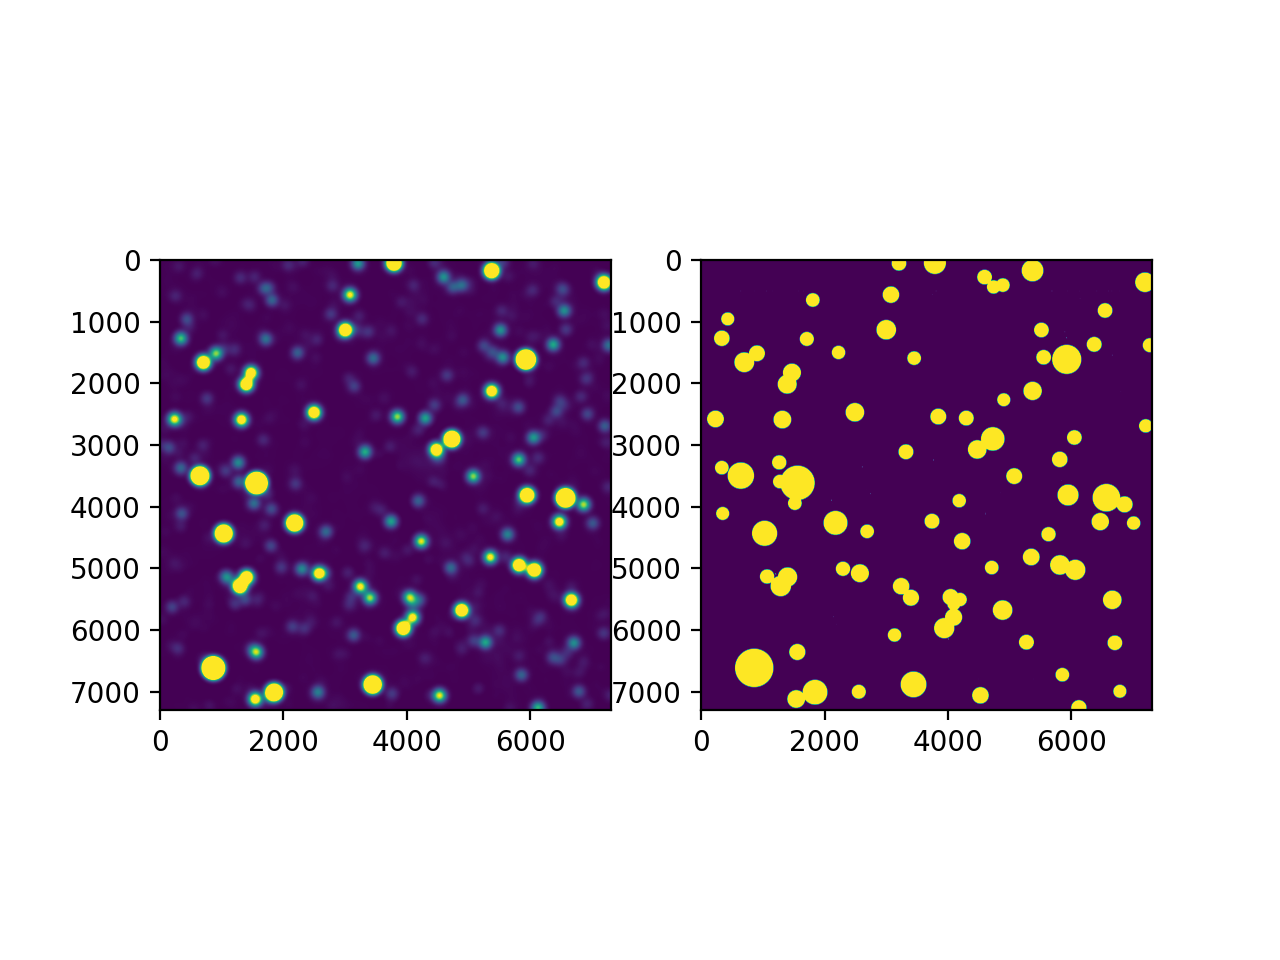

In [10]:

plt.figure()
plt.subplot(121)
plt.imshow(test,vmin=0,vmax=1e3)

plt.subplot(122)
plt.imshow(((sat.ps1.mask & 0x0080) > 0))


#plt.subplot(122)
#plt.imshow(test,vmax=1e3)

In [23]:
!open .

In [59]:
from datetime import date
import traceback

class join_ps1():
    def __init__(self,datapath,skycells,psf_std=70,combine=[0.238,0.344,0.283,0.135],
                 catalog_path=None,savepath='.',suffix='rizy.conv',
                 use_mask=True,overwrite=False,pad=500,verbose=0,run=True):
        self.datapath = datapath
        self.psf_std = psf_std
        self.combine = np.array(combine)
        self.skycells = skycells
        self.catalog_path = catalog_path
        self.savepath = savepath
        self.suffix = suffix
        self.overwrite = overwrite
        self.pad = pad
        self.verbose = verbose
        self.use_mask = use_mask
        if run:
            self.run()
        
        
    def run(self):
        self._gather_ps1()
        self._load_skycells()
        self._make_psf()
        self.process()
        
    def _gather_ps1(self):
        files = np.array(glob(f'{self.datapath}/*.unconv.fits'))
        cell = np.array([f.split('.stk')[0] + '.stk.' for f in files])
        good = []
        for i in range(len(cell)):
            if sum(cell[i] == cell) == 4:
                good += [cell[i]]
        good = list(set(good))
        self.fields = good
        #if self.skycell is not None:
    
    def _load_skycells(self):
        if type(self.skycells) == str:
            self.skycells = pd.read_csv(self.skycells)
    
    def _make_psf(self):
        size = 2000
        y, x = np.mgrid[:size, :size]
        x = x - size/2; y = y - size/2
        psfg = models.Gaussian2D(x_stddev=self.psf_std,y_stddev=self.psf_std)
        psfg = psfg(x,y)
        psfg /= np.nansum(psfg)
        self.psf = psfg
        
    
    def process(self):
        for file in self.fields:
                try:
                    out = self.savepath + file.split('/')[-1] + self.suffix + '.fits'
                    exist = glob(out)
                    if (len(exist) == 0) | self.overwrite:
                        if self.verbose > 0:
                            print(f'Starting field {file.split('/')[-1].split('.stk')[0]}')
                        bands = ['r','i','z','y']
                        images = []
                        masks = []
                        for b in bands:
                            f = file + f'{b}.unconv.fits'
                            if b == 'r':
                                ps1 = ps1_data(f,mask=self.use_mask,catalog=self.catalog_path+'ps1.csv',
                                               toflux=False,pad=self.pad)
                            else:
                                ps1._load_image(f)
                                ps1._load_mask(f)

                            pad = pad_skycell(ps1=ps1,skycells=self.skycells,datapath=self.datapath)
                            sat = saturated_stars(deepcopy(pad.ps1))#,catalogpath=self.catalog_path)
                            images += [sat.ps1.padded]
                            masks += [sat.ps1.mask]
                            print(f'Done {b}')
                        self.ps1 = sat.ps1
                        images = np.array(images)
                        masks = np.array(masks,dtype=int)
                        image = np.nansum(images*self.combine[:,np.newaxis,np.newaxis],axis=0)
                        image = fftconvolve(image,self.psf,mode='same')
                        mask = masks[0]
                        for m in masks[1:]:
                            mask = mask | m
                        self.ps1.padded = image
                        self.ps1.mask = mask
                        self._update_header()
                        savename = file.split('/')[-1] + f'{self.suffix}'
                        self.ps1.save_image(savepath,savename,overwrite=self.overwrite)
                        print('Saved: ',savename)
                        savename = file.split('/')[-1] + f'{self.suffix}.mask'
                        self.ps1.save_mask(savepath,savename,overwrite=self.overwrite)
                except Exception:
                    print(traceback.format_exc())

            
    def _update_header(self):
        header = self.ps1.header
        badkeys = ['HISTORY','INP_*','SCL_*','ZPT_*','EXP_*','AIR_*','HIERARCH*']
        for key in badkeys:
            del header[key]
        header['FILTER'] = ('rizy','Filter used')
        header['COMBINE'] = (True, 'Combined image')
        header['PSFTYPE'] = ('Gaussian', 'Type of PSF used in convolution')
        header['PSFstd'] = (self.psf_std, 'Standard deviation of Gaussian')
        header['FRACR'] = (self.combine[0], 'Fraction of r used')
        header['FRACI'] = (self.combine[1], 'Fraction of i used')
        header['FRACZ'] = (self.combine[2], 'Fraction of z used')
        header['FRACY'] = (self.combine[3], 'Fraction of y used')
        header['COMBDATE'] = (date.today().isoformat(),'Date of combination')
        
        self.ps1.header = header

In [60]:
datapath = '/Users/rri38/Documents/work/code/SynDiff/development/data/ps1_skycell/'
catpath = '/Users/rri38/Documents/work/code/SynDiff/development/data/catalogs/s20ccd1_'
savepath = './test/'
skycells = '../SkyCells/Sector020/skycell_s20_c1.csv'
mask = join_ps1(datapath=datapath,skycells=skycells,catalog_path=catpath,savepath=savepath,verbose=1,overwrite=False)

Starting field rings.v3.skycell.2247.046
Traceback (most recent call last):
  File "/var/folders/db/hdghk6ts5g11hr10jq0ss625nf1ny2/T/ipykernel_11094/387085533.py", line 74, in process
    pad = pad_skycell(ps1=ps1,skycells=self.skycells,datapath=self.datapath)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/rri38/Documents/work/code/SynDiff/development/ps1_to_convolved/../../src/scenes/pad_skycell.py", line 40, in __init__
    self.run()
  File "/Users/rri38/Documents/work/code/SynDiff/development/ps1_to_convolved/../../src/scenes/pad_skycell.py", line 57, in run
    self._pad_corners()
  File "/Users/rri38/Documents/work/code/SynDiff/development/ps1_to_convolved/../../src/scenes/pad_skycell.py", line 169, in _pad_corners
    buff = hdul[j].data
           ^^^^^^^^^^^^
  File "/Users/rri38/miniconda3/lib/python3.12/site-packages/astropy/utils/decorators.py", line 836, in __get__
    val = self.fget(obj)
          ^^^^^^^^^^^^^^
  File "/Users

--2024-09-05 17:28:30--  http://ps1images.stsci.edu//rings.v3.skycell/2247/066/rings.v3.skycell.2247.066.stk.r.unconv.fits
Resolving ps1images.stsci.edu (ps1images.stsci.edu)... 130.167.201.61
Connecting to ps1images.stsci.edu (ps1images.stsci.edu)|130.167.201.61|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68284800 (65M) [image/fits]
Saving to: ‘/Users/rri38/Documents/work/code/SynDiff/development/data/ps1_skycell/rings.v3.skycell.2247.066.stk.r.unconv.fits’

     0K .......... .......... .......... .......... ..........  0% 6.37M 10s
    50K .......... .......... .......... .......... ..........  0% 8.01M 9s
   100K .......... .......... .......... .......... ..........  0% 10.4M 8s
   150K .......... .......... .......... .......... ..........  0% 8.63M 8s
   200K .......... .......... .......... .......... ..........  0% 7.18M 8s
   250K .......... .......... .......... .......... ..........  0% 12.0M 8s
   300K .......... .......... .......... .........

  7850K .......... .......... .......... .......... .......... 11% 10.7M 4s
  7900K .......... .......... .......... .......... .......... 11% 45.4M 4s
  7950K .......... .......... .......... .......... .......... 11% 5.40M 4s
  8000K .......... .......... .......... .......... .......... 12% 17.9M 4s
  8050K .......... .......... .......... .......... .......... 12% 18.5M 4s
  8100K .......... .......... .......... .......... .......... 12% 13.3M 4s
  8150K .......... .......... .......... .......... .......... 12% 9.38M 4s
  8200K .......... .......... .......... .......... .......... 12%  133M 4s
  8250K .......... .......... .......... .......... .......... 12% 17.5M 4s
  8300K .......... .......... .......... .......... .......... 12% 18.7M 4s
  8350K .......... .......... .......... .......... .......... 12% 14.9M 4s
  8400K .......... .......... .......... .......... .......... 12% 15.1M 4s
  8450K .......... .......... .......... .......... .......... 12% 18.2M 4s
  8500K ....

 14050K .......... .......... .......... .......... .......... 21% 2.93M 4s
 14100K .......... .......... .......... .......... .......... 21% 19.2M 4s
 14150K .......... .......... .......... .......... .......... 21%  465M 4s
 14200K .......... .......... .......... .......... .......... 21%  376M 4s
 14250K .......... .......... .......... .......... .......... 21%  432M 4s
 14300K .......... .......... .......... .......... .......... 21%  555M 4s
 14350K .......... .......... .......... .......... .......... 21%  143M 4s
 14400K .......... .......... .......... .......... .......... 21% 15.2M 4s
 14450K .......... .......... .......... .......... .......... 21% 11.0M 4s
 14500K .......... .......... .......... .......... .......... 21% 39.3M 4s
 14550K .......... .......... .......... .......... .......... 21% 14.9M 4s
 14600K .......... .......... .......... .......... .......... 21% 15.0M 4s
 14650K .......... .......... .......... .......... .......... 22% 18.8M 4s
 14700K ....

 20700K .......... .......... .......... .......... .......... 31% 24.3M 3s
 20750K .......... .......... .......... .......... .......... 31% 17.7M 3s
 20800K .......... .......... .......... .......... .......... 31% 14.8M 3s
 20850K .......... .......... .......... .......... .......... 31% 17.7M 3s
 20900K .......... .......... .......... .......... .......... 31% 15.9M 3s
 20950K .......... .......... .......... .......... .......... 31% 12.8M 3s
 21000K .......... .......... .......... .......... .......... 31% 19.6M 3s
 21050K .......... .......... .......... .......... .......... 31% 15.5M 3s
 21100K .......... .......... .......... .......... .......... 31% 12.5M 3s
 21150K .......... .......... .......... .......... .......... 31% 20.3M 3s
 21200K .......... .......... .......... .......... .......... 31% 14.5M 3s
 21250K .......... .......... .......... .......... .......... 31% 15.1M 3s
 21300K .......... .......... .......... .......... .......... 32% 17.3M 3s
 21350K ....

 27100K .......... .......... .......... .......... .......... 40% 14.6M 3s
 27150K .......... .......... .......... .......... .......... 40% 13.6M 3s
 27200K .......... .......... .......... .......... .......... 40% 15.6M 3s
 27250K .......... .......... .......... .......... .......... 40% 10.2M 3s
 27300K .......... .......... .......... .......... .......... 41% 56.1M 3s
 27350K .......... .......... .......... .......... .......... 41% 18.8M 3s
 27400K .......... .......... .......... .......... .......... 41% 13.1M 3s
 27450K .......... .......... .......... .......... .......... 41% 16.4M 3s
 27500K .......... .......... .......... .......... .......... 41% 18.0M 3s
 27550K .......... .......... .......... .......... .......... 41% 15.6M 3s
 27600K .......... .......... .......... .......... .......... 41% 13.0M 3s
 27650K .......... .......... .......... .......... .......... 41% 16.5M 3s
 27700K .......... .......... .......... .......... .......... 41% 17.6M 3s
 27750K ....

 33600K .......... .......... .......... .......... .......... 50% 14.8M 2s
 33650K .......... .......... .......... .......... .......... 50% 14.7M 2s
 33700K .......... .......... .......... .......... .......... 50% 19.3M 2s
 33750K .......... .......... .......... .......... .......... 50% 13.9M 2s
 33800K .......... .......... .......... .......... .......... 50% 13.1M 2s
 33850K .......... .......... .......... .......... .......... 50% 18.7M 2s
 33900K .......... .......... .......... .......... .......... 50% 14.0M 2s
 33950K .......... .......... .......... .......... .......... 50% 11.0M 2s
 34000K .......... .......... .......... .......... .......... 51% 41.8M 2s
 34050K .......... .......... .......... .......... .......... 51% 17.5M 2s
 34100K .......... .......... .......... .......... .......... 51% 10.1M 2s
 34150K .......... .......... .......... .......... .......... 51% 44.8M 2s
 34200K .......... .......... .......... .......... .......... 51% 13.8M 2s
 34250K ....

 39950K .......... .......... .......... .......... .......... 59% 19.8M 2s
 40000K .......... .......... .......... .......... .......... 60% 11.3M 2s
 40050K .......... .......... .......... .......... .......... 60% 49.7M 2s
 40100K .......... .......... .......... .......... .......... 60% 14.2M 2s
 40150K .......... .......... .......... .......... .......... 60% 15.7M 2s
 40200K .......... .......... .......... .......... .......... 60% 13.5M 2s
 40250K .......... .......... .......... .......... .......... 60% 28.1M 2s
 40300K .......... .......... .......... .......... .......... 60% 10.4M 2s
 40350K .......... .......... .......... .......... .......... 60% 37.7M 2s
 40400K .......... .......... .......... .......... .......... 60% 5.67M 2s
 40450K .......... .......... .......... .......... .......... 60% 13.6M 2s
 40500K .......... .......... .......... .......... .......... 60% 23.8M 2s
 40550K .......... .......... .......... .......... .......... 60% 19.3M 2s
 40600K ....

 45650K .......... .......... .......... .......... .......... 68% 11.8M 1s
 45700K .......... .......... .......... .......... .......... 68% 19.8M 1s
 45750K .......... .......... .......... .......... .......... 68% 19.8M 1s
 45800K .......... .......... .......... .......... .......... 68% 13.5M 1s
 45850K .......... .......... .......... .......... .......... 68% 24.2M 1s
 45900K .......... .......... .......... .......... .......... 68% 13.8M 1s
 45950K .......... .......... .......... .......... .......... 68% 11.5M 1s
 46000K .......... .......... .......... .......... .......... 69% 22.8M 1s
 46050K .......... .......... .......... .......... .......... 69% 15.8M 1s
 46100K .......... .......... .......... .......... .......... 69% 14.9M 1s
 46150K .......... .......... .......... .......... .......... 69% 18.9M 1s
 46200K .......... .......... .......... .......... .......... 69% 14.5M 1s
 46250K .......... .......... .......... .......... .......... 69% 16.7M 1s
 46300K ....

 51750K .......... .......... .......... .......... .......... 77% 12.0M 1s
 51800K .......... .......... .......... .......... .......... 77% 14.6M 1s
 51850K .......... .......... .......... .......... .......... 77% 15.2M 1s
 51900K .......... .......... .......... .......... .......... 77% 24.6M 1s
 51950K .......... .......... .......... .......... .......... 77% 19.0M 1s
 52000K .......... .......... .......... .......... .......... 78% 9.58M 1s
 52050K .......... .......... .......... .......... .......... 78% 29.8M 1s
 52100K .......... .......... .......... .......... .......... 78% 19.4M 1s
 52150K .......... .......... .......... .......... .......... 78% 10.7M 1s
 52200K .......... .......... .......... .......... .......... 78% 14.5M 1s
 52250K .......... .......... .......... .......... .......... 78% 36.5M 1s
 52300K .......... .......... .......... .......... .......... 78% 13.3M 1s
 52350K .......... .......... .......... .......... .......... 78% 17.5M 1s
 52400K ....

 58150K .......... .......... .......... .......... .......... 87% 11.5M 1s
 58200K .......... .......... .......... .......... .......... 87% 16.1M 1s
 58250K .......... .......... .......... .......... .......... 87% 28.4M 1s
 58300K .......... .......... .......... .......... .......... 87% 12.8M 1s
 58350K .......... .......... .......... .......... .......... 87% 25.6M 1s
 58400K .......... .......... .......... .......... .......... 87% 13.0M 1s
 58450K .......... .......... .......... .......... .......... 87% 6.23M 1s
 58500K .......... .......... .......... .......... .......... 87% 15.9M 1s
 58550K .......... .......... .......... .......... .......... 87% 14.7M 1s
 58600K .......... .......... .......... .......... .......... 87% 18.0M 1s
 58650K .......... .......... .......... .......... .......... 88% 19.5M 1s
 58700K .......... .......... .......... .......... .......... 88% 15.5M 1s
 58750K .......... .......... .......... .......... .......... 88% 18.5M 1s
 58800K ....

 64350K .......... .......... .......... .......... .......... 96%  761K 0s
 64400K .......... .......... .......... .......... .......... 96% 28.2M 0s
 64450K .......... .......... .......... .......... .......... 96% 19.4M 0s
 64500K .......... .......... .......... .......... .......... 96% 14.4M 0s
 64550K .......... .......... .......... .......... .......... 96% 18.4M 0s
 64600K .......... .......... .......... .......... .......... 96% 13.2M 0s
 64650K .......... .......... .......... .......... .......... 97% 19.1M 0s
 64700K .......... .......... .......... .......... .......... 97% 8.33M 0s
 64750K .......... .......... .......... .......... .......... 97% 26.7M 0s
 64800K .......... .......... .......... .......... .......... 97% 16.9M 0s
 64850K .......... .......... .......... .......... .......... 97% 17.7M 0s
 64900K .......... .......... .......... .......... .......... 97% 16.9M 0s
 64950K .......... .......... .......... .......... .......... 97% 14.3M 0s
 65000K ....

  4900K .......... .......... .......... .......... ..........  7% 5.45M 5s
  4950K .......... .......... .......... .......... ..........  7% 34.2M 5s
  5000K .......... .......... .......... .......... ..........  7%  197M 5s
  5050K .......... .......... .......... .......... ..........  7% 34.4M 5s
  5100K .......... .......... .......... .......... ..........  7% 14.4M 5s
  5150K .......... .......... .......... .......... ..........  7% 38.7M 5s
  5200K .......... .......... .......... .......... ..........  7% 12.4M 5s
  5250K .......... .......... .......... .......... ..........  8% 24.1M 5s
  5300K .......... .......... .......... .......... ..........  8% 10.7M 5s
  5350K .......... .......... .......... .......... ..........  8% 24.6M 5s
  5400K .......... .......... .......... .......... ..........  8% 14.0M 5s
  5450K .......... .......... .......... .......... ..........  8% 6.31M 5s
  5500K .......... .......... .......... .......... ..........  8% 20.0M 5s
  5550K ....

 11350K .......... .......... .......... .......... .......... 17% 12.0M 4s
 11400K .......... .......... .......... .......... .......... 17% 26.4M 4s
 11450K .......... .......... .......... .......... .......... 17% 15.5M 4s
 11500K .......... .......... .......... .......... .......... 17% 17.1M 4s
 11550K .......... .......... .......... .......... .......... 17% 19.2M 4s
 11600K .......... .......... .......... .......... .......... 17% 15.9M 4s
 11650K .......... .......... .......... .......... .......... 17% 17.5M 4s
 11700K .......... .......... .......... .......... .......... 17% 11.9M 4s
 11750K .......... .......... .......... .......... .......... 17% 10.7M 4s
 11800K .......... .......... .......... .......... .......... 17% 44.1M 4s
 11850K .......... .......... .......... .......... .......... 18% 19.0M 4s
 11900K .......... .......... .......... .......... .......... 18% 15.3M 4s
 11950K .......... .......... .......... .......... .......... 18% 19.3M 4s
 12000K ....

 17850K .......... .......... .......... .......... .......... 27% 14.1M 3s
 17900K .......... .......... .......... .......... .......... 27% 15.4M 3s
 17950K .......... .......... .......... .......... .......... 27% 15.2M 3s
 18000K .......... .......... .......... .......... .......... 27% 21.3M 3s
 18050K .......... .......... .......... .......... .......... 27% 14.2M 3s
 18100K .......... .......... .......... .......... .......... 27% 16.5M 3s
 18150K .......... .......... .......... .......... .......... 27% 17.1M 3s
 18200K .......... .......... .......... .......... .......... 27% 15.1M 3s
 18250K .......... .......... .......... .......... .......... 27% 20.9M 3s
 18300K .......... .......... .......... .......... .......... 27% 11.5M 3s
 18350K .......... .......... .......... .......... .......... 27% 23.6M 3s
 18400K .......... .......... .......... .......... .......... 27% 14.9M 3s
 18450K .......... .......... .......... .......... .......... 27% 15.6M 3s
 18500K ....

 23700K .......... .......... .......... .......... .......... 35% 6.11M 3s
 23750K .......... .......... .......... .......... .......... 36% 14.6M 3s
 23800K .......... .......... .......... .......... .......... 36% 7.35M 3s
 23850K .......... .......... .......... .......... .......... 36% 13.5M 3s
 23900K .......... .......... .......... .......... .......... 36% 18.4M 3s
 23950K .......... .......... .......... .......... .......... 36% 17.1M 3s
 24000K .......... .......... .......... .......... .......... 36% 17.2M 3s
 24050K .......... .......... .......... .......... .......... 36% 12.8M 3s
 24100K .......... .......... .......... .......... .......... 36% 7.85M 3s
 24150K .......... .......... .......... .......... .......... 36%  311M 3s
 24200K .......... .......... .......... .......... .......... 36% 30.0M 3s
 24250K .......... .......... .......... .......... .......... 36% 13.6M 3s
 24300K .......... .......... .......... .......... .......... 36% 17.5M 3s
 24350K ....

 29900K .......... .......... .......... .......... .......... 45% 18.0M 2s
 29950K .......... .......... .......... .......... .......... 45% 14.3M 2s
 30000K .......... .......... .......... .......... .......... 45% 19.5M 2s
 30050K .......... .......... .......... .......... .......... 45% 6.10M 2s
 30100K .......... .......... .......... .......... .......... 45% 13.2M 2s
 30150K .......... .......... .......... .......... .......... 45% 19.2M 2s
 30200K .......... .......... .......... .......... .......... 45% 11.9M 2s
 30250K .......... .......... .......... .......... .......... 45% 15.4M 2s
 30300K .......... .......... .......... .......... .......... 45% 21.8M 2s
 30350K .......... .......... .......... .......... .......... 45% 12.7M 2s
 30400K .......... .......... .......... .......... .......... 46% 17.7M 2s
 30450K .......... .......... .......... .......... .......... 46% 16.1M 2s
 30500K .......... .......... .......... .......... .......... 46% 13.2M 2s
 30550K ....

 36100K .......... .......... .......... .......... .......... 54% 13.9M 2s
 36150K .......... .......... .......... .......... .......... 54% 15.2M 2s
 36200K .......... .......... .......... .......... .......... 54% 19.4M 2s
 36250K .......... .......... .......... .......... .......... 54% 12.1M 2s
 36300K .......... .......... .......... .......... .......... 54% 38.9M 2s
 36350K .......... .......... .......... .......... .......... 55% 12.6M 2s
 36400K .......... .......... .......... .......... .......... 55% 11.7M 2s
 36450K .......... .......... .......... .......... .......... 55% 30.6M 2s
 36500K .......... .......... .......... .......... .......... 55% 13.2M 2s
 36550K .......... .......... .......... .......... .......... 55% 18.6M 2s
 36600K .......... .......... .......... .......... .......... 55% 18.8M 2s
 36650K .......... .......... .......... .......... .......... 55% 13.7M 2s
 36700K .......... .......... .......... .......... .......... 55% 15.7M 2s
 36750K ....

 42450K .......... .......... .......... .......... .......... 64% 12.2M 2s
 42500K .......... .......... .......... .......... .......... 64% 27.0M 2s
 42550K .......... .......... .......... .......... .......... 64% 38.9M 2s
 42600K .......... .......... .......... .......... .......... 64% 25.9M 2s
 42650K .......... .......... .......... .......... .......... 64% 12.7M 2s
 42700K .......... .......... .......... .......... .......... 64% 16.1M 2s
 42750K .......... .......... .......... .......... .......... 64% 27.9M 2s
 42800K .......... .......... .......... .......... .......... 64% 12.6M 2s
 42850K .......... .......... .......... .......... .......... 64% 20.7M 2s
 42900K .......... .......... .......... .......... .......... 64% 14.6M 2s
 42950K .......... .......... .......... .......... .......... 65% 14.4M 2s
 43000K .......... .......... .......... .......... .......... 65% 19.1M 2s
 43050K .......... .......... .......... .......... .......... 65% 14.2M 2s
 43100K ....

 49000K .......... .......... .......... .......... .......... 74% 15.5M 1s
 49050K .......... .......... .......... .......... .......... 74% 13.8M 1s
 49100K .......... .......... .......... .......... .......... 74% 16.4M 1s
 49150K .......... .......... .......... .......... .......... 74% 16.8M 1s
 49200K .......... .......... .......... .......... .......... 74% 15.2M 1s
 49250K .......... .......... .......... .......... .......... 74% 19.5M 1s
 49300K .......... .......... .......... .......... .......... 74% 11.6M 1s
 49350K .......... .......... .......... .......... .......... 74% 31.9M 1s
 49400K .......... .......... .......... .......... .......... 74% 12.4M 1s
 49450K .......... .......... .......... .......... .......... 74% 22.4M 1s
 49500K .......... .......... .......... .......... .......... 74% 20.1M 1s
 49550K .......... .......... .......... .......... .......... 75% 17.5M 1s
 49600K .......... .......... .......... .......... .......... 75% 12.2M 1s
 49650K ....

 55200K .......... .......... .......... .......... .......... 83% 9.28M 1s
 55250K .......... .......... .......... .......... .......... 83% 13.5M 1s
 55300K .......... .......... .......... .......... .......... 83%  185M 1s
 55350K .......... .......... .......... .......... .......... 83% 14.5M 1s
 55400K .......... .......... .......... .......... .......... 83% 10.6M 1s
 55450K .......... .......... .......... .......... .......... 83% 40.6M 1s
 55500K .......... .......... .......... .......... .......... 84% 14.1M 1s
 55550K .......... .......... .......... .......... .......... 84% 14.8M 1s
 55600K .......... .......... .......... .......... .......... 84% 21.0M 1s
 55650K .......... .......... .......... .......... .......... 84% 14.2M 1s
 55700K .......... .......... .......... .......... .......... 84% 14.0M 1s
 55750K .......... .......... .......... .......... .......... 84% 18.6M 1s
 55800K .......... .......... .......... .......... .......... 84% 13.6M 1s
 55850K ....

 61750K .......... .......... .......... .......... .......... 93% 10.1M 0s
 61800K .......... .......... .......... .......... .......... 93% 51.9M 0s
 61850K .......... .......... .......... .......... .......... 93% 16.2M 0s
 61900K .......... .......... .......... .......... .......... 93% 10.7M 0s
 61950K .......... .......... .......... .......... .......... 93% 63.3M 0s
 62000K .......... .......... .......... .......... .......... 93% 15.1M 0s
 62050K .......... .......... .......... .......... .......... 93% 11.2M 0s
 62100K .......... .......... .......... .......... .......... 94% 35.4M 0s
 62150K .......... .......... .......... .......... .......... 94% 15.7M 0s
 62200K .......... .......... .......... .......... .......... 94% 17.3M 0s
 62250K .......... .......... .......... .......... .......... 94% 11.7M 0s
 62300K .......... .......... .......... .......... .......... 94% 22.1M 0s
 62350K .......... .......... .......... .......... .......... 94% 17.8M 0s
 62400K ....

  1150K .......... .......... .......... .......... ..........  1% 10.1M 5s
  1200K .......... .......... .......... .......... ..........  1% 12.5M 5s
  1250K .......... .......... .......... .......... ..........  1% 22.3M 5s
  1300K .......... .......... .......... .......... ..........  2% 12.8M 5s
  1350K .......... .......... .......... .......... ..........  2% 12.0M 5s
  1400K .......... .......... .......... .......... ..........  2% 14.0M 5s
  1450K .......... .......... .......... .......... ..........  2% 19.8M 5s
  1500K .......... .......... .......... .......... ..........  2% 14.9M 5s
  1550K .......... .......... .......... .......... ..........  2% 15.6M 5s
  1600K .......... .......... .......... .......... ..........  2% 15.4M 5s
  1650K .......... .......... .......... .......... ..........  2% 16.9M 5s
  1700K .......... .......... .......... .......... ..........  2% 13.6M 5s
  1750K .......... .......... .......... .......... ..........  2% 11.5M 5s
  1800K ....

  7400K .......... .......... .......... .......... .......... 11% 8.38M 4s
  7450K .......... .......... .......... .......... .......... 11% 30.8M 4s
  7500K .......... .......... .......... .......... .......... 11% 25.5M 4s
  7550K .......... .......... .......... .......... .......... 11% 13.6M 4s
  7600K .......... .......... .......... .......... .......... 11% 14.7M 4s
  7650K .......... .......... .......... .......... .......... 11% 17.7M 4s
  7700K .......... .......... .......... .......... .......... 11% 5.95M 4s
  7750K .......... .......... .......... .......... .......... 11% 17.4M 4s
  7800K .......... .......... .......... .......... .......... 11% 18.2M 4s
  7850K .......... .......... .......... .......... .......... 11% 17.3M 4s
  7900K .......... .......... .......... .......... .......... 11% 11.1M 4s
  7950K .......... .......... .......... .......... .......... 11% 29.2M 4s
  8000K .......... .......... .......... .......... .......... 12% 13.9M 4s
  8050K ....

 13800K .......... .......... .......... .......... .......... 20% 13.2M 4s
 13850K .......... .......... .......... .......... .......... 20% 32.4M 4s
 13900K .......... .......... .......... .......... .......... 20% 14.4M 4s
 13950K .......... .......... .......... .......... .......... 20% 18.6M 3s
 14000K .......... .......... .......... .......... .......... 21% 18.8M 3s
 14050K .......... .......... .......... .......... .......... 21% 5.62M 4s
 14100K .......... .......... .......... .......... .......... 21% 20.3M 4s
 14150K .......... .......... .......... .......... .......... 21% 19.2M 3s
 14200K .......... .......... .......... .......... .......... 21% 15.0M 3s
 14250K .......... .......... .......... .......... .......... 21% 20.3M 3s
 14300K .......... .......... .......... .......... .......... 21% 13.5M 3s
 14350K .......... .......... .......... .......... .......... 21% 14.7M 3s
 14400K .......... .......... .......... .......... .......... 21% 19.9M 3s
 14450K ....

 20050K .......... .......... .......... .......... .......... 30% 17.8M 3s
 20100K .......... .......... .......... .......... .......... 30% 19.7M 3s
 20150K .......... .......... .......... .......... .......... 30% 14.0M 3s
 20200K .......... .......... .......... .......... .......... 30% 16.7M 3s
 20250K .......... .......... .......... .......... .......... 30% 17.4M 3s
 20300K .......... .......... .......... .......... .......... 30% 14.5M 3s
 20350K .......... .......... .......... .......... .......... 30% 13.6M 3s
 20400K .......... .......... .......... .......... .......... 30% 14.2M 3s
 20450K .......... .......... .......... .......... .......... 30% 21.0M 3s
 20500K .......... .......... .......... .......... .......... 30% 14.6M 3s
 20550K .......... .......... .......... .......... .......... 30% 24.1M 3s
 20600K .......... .......... .......... .......... .......... 30% 13.2M 3s
 20650K .......... .......... .......... .......... .......... 31% 15.1M 3s
 20700K ....

 26350K .......... .......... .......... .......... .......... 39% 5.65M 3s
 26400K .......... .......... .......... .......... .......... 39% 11.7M 3s
 26450K .......... .......... .......... .......... .......... 39% 27.4M 3s
 26500K .......... .......... .......... .......... .......... 39% 17.7M 3s
 26550K .......... .......... .......... .......... .......... 39% 14.8M 3s
 26600K .......... .......... .......... .......... .......... 39% 15.7M 3s
 26650K .......... .......... .......... .......... .......... 39% 18.3M 3s
 26700K .......... .......... .......... .......... .......... 40% 16.7M 3s
 26750K .......... .......... .......... .......... .......... 40% 13.8M 3s
 26800K .......... .......... .......... .......... .......... 40% 14.8M 3s
 26850K .......... .......... .......... .......... .......... 40% 21.3M 3s
 26900K .......... .......... .......... .......... .......... 40% 20.5M 3s
 26950K .......... .......... .......... .......... .......... 40% 6.44M 3s
 27000K ....

 32450K .......... .......... .......... .......... .......... 48% 5.12M 2s
 32500K .......... .......... .......... .......... .......... 48%  119M 2s
 32550K .......... .......... .......... .......... .......... 48%  270M 2s
 32600K .......... .......... .......... .......... .......... 48% 22.6M 2s
 32650K .......... .......... .......... .......... .......... 48% 14.9M 2s
 32700K .......... .......... .......... .......... .......... 49% 36.3M 2s
 32750K .......... .......... .......... .......... .......... 49% 11.5M 2s
 32800K .......... .......... .......... .......... .......... 49% 23.4M 2s
 32850K .......... .......... .......... .......... .......... 49% 18.7M 2s
 32900K .......... .......... .......... .......... .......... 49% 13.2M 2s
 32950K .......... .......... .......... .......... .......... 49% 19.7M 2s
 33000K .......... .......... .......... .......... .......... 49% 15.7M 2s
 33050K .......... .......... .......... .......... .......... 49% 10.5M 2s
 33100K ....

 38850K .......... .......... .......... .......... .......... 58% 15.2M 2s
 38900K .......... .......... .......... .......... .......... 58% 14.8M 2s
 38950K .......... .......... .......... .......... .......... 58% 24.3M 2s
 39000K .......... .......... .......... .......... .......... 58% 12.4M 2s
 39050K .......... .......... .......... .......... .......... 58% 21.5M 2s
 39100K .......... .......... .......... .......... .......... 58% 14.7M 2s
 39150K .......... .......... .......... .......... .......... 58% 7.99M 2s
 39200K .......... .......... .......... .......... .......... 58% 61.8M 2s
 39250K .......... .......... .......... .......... .......... 58% 15.4M 2s
 39300K .......... .......... .......... .......... .......... 58% 32.8M 2s
 39350K .......... .......... .......... .......... .......... 59% 17.9M 2s
 39400K .......... .......... .......... .......... .......... 59% 13.7M 2s
 39450K .......... .......... .......... .......... .......... 59% 13.9M 2s
 39500K ....

 45000K .......... .......... .......... .......... .......... 67% 16.7M 1s
 45050K .......... .......... .......... .......... .......... 67% 19.7M 1s
 45100K .......... .......... .......... .......... .......... 67% 16.9M 1s
 45150K .......... .......... .......... .......... .......... 67% 18.8M 1s
 45200K .......... .......... .......... .......... .......... 67% 6.00M 1s
 45250K .......... .......... .......... .......... .......... 67% 15.5M 1s
 45300K .......... .......... .......... .......... .......... 67% 19.1M 1s
 45350K .......... .......... .......... .......... .......... 67% 11.0M 1s
 45400K .......... .......... .......... .......... .......... 68% 13.7M 1s
 45450K .......... .......... .......... .......... .......... 68% 22.7M 1s
 45500K .......... .......... .......... .......... .......... 68% 6.44M 1s
 45550K .......... .......... .......... .......... .......... 68% 8.91M 1s
 45600K .......... .......... .......... .......... .......... 68%  216M 1s
 45650K ....

 51000K .......... .......... .......... .......... .......... 76% 11.1M 1s
 51050K .......... .......... .......... .......... .......... 76% 30.8M 1s
 51100K .......... .......... .......... .......... .......... 76% 12.8M 1s
 51150K .......... .......... .......... .......... .......... 76% 18.1M 1s
 51200K .......... .......... .......... .......... .......... 76% 12.1M 1s
 51250K .......... .......... .......... .......... .......... 76% 20.2M 1s
 51300K .......... .......... .......... .......... .......... 76% 16.6M 1s
 51350K .......... .......... .......... .......... .......... 76% 19.1M 1s
 51400K .......... .......... .......... .......... .......... 77% 13.7M 1s
 51450K .......... .......... .......... .......... .......... 77% 17.2M 1s
 51500K .......... .......... .......... .......... .......... 77% 15.2M 1s
 51550K .......... .......... .......... .......... .......... 77% 21.8M 1s
 51600K .......... .......... .......... .......... .......... 77% 15.5M 1s
 51650K ....

 57600K .......... .......... .......... .......... .......... 86%  697K 1s
 57650K .......... .......... .......... .......... .......... 86% 18.4M 1s
 57700K .......... .......... .......... .......... .......... 86% 19.4M 1s
 57750K .......... .......... .......... .......... .......... 86% 16.5M 1s
 57800K .......... .......... .......... .......... .......... 86% 16.3M 1s
 57850K .......... .......... .......... .......... .......... 86% 19.4M 1s
 57900K .......... .......... .......... .......... .......... 86% 9.66M 1s
 57950K .......... .......... .......... .......... .......... 86% 22.4M 1s
 58000K .......... .......... .......... .......... .......... 86% 18.0M 1s
 58050K .......... .......... .......... .......... .......... 87% 15.4M 1s
 58100K .......... .......... .......... .......... .......... 87% 16.6M 1s
 58150K .......... .......... .......... .......... .......... 87% 19.1M 1s
 58200K .......... .......... .......... .......... .......... 87% 10.9M 1s
 58250K ....

 63000K .......... .......... .......... .......... .......... 94% 16.5M 0s
 63050K .......... .......... .......... .......... .......... 94% 13.7M 0s
 63100K .......... .......... .......... .......... .......... 94% 7.17M 0s
 63150K .......... .......... .......... .......... .......... 94% 50.1M 0s
 63200K .......... .......... .......... .......... .......... 94% 43.1M 0s
 63250K .......... .......... .......... .......... .......... 94% 19.3M 0s
 63300K .......... .......... .......... .......... .......... 94% 17.4M 0s
 63350K .......... .......... .......... .......... .......... 94% 14.5M 0s
 63400K .......... .......... .......... .......... .......... 95% 23.7M 0s
 63450K .......... .......... .......... .......... .......... 95% 12.4M 0s
 63500K .......... .......... .......... .......... .......... 95% 18.7M 0s
 63550K .......... .......... .......... .......... .......... 95% 16.6M 0s
 63600K .......... .......... .......... .......... .......... 95% 14.3M 0s
 63650K ....

  3850K .......... .......... .......... .......... ..........  5% 18.9M 5s
  3900K .......... .......... .......... .......... ..........  5% 13.1M 5s
  3950K .......... .......... .......... .......... ..........  5% 20.2M 5s
  4000K .......... .......... .......... .......... ..........  6% 14.9M 5s
  4050K .......... .......... .......... .......... ..........  6% 11.8M 5s
  4100K .......... .......... .......... .......... ..........  6% 23.6M 5s
  4150K .......... .......... .......... .......... ..........  6% 10.9M 5s
  4200K .......... .......... .......... .......... ..........  6% 11.8M 5s
  4250K .......... .......... .......... .......... ..........  6% 15.3M 5s
  4300K .......... .......... .......... .......... ..........  6% 22.6M 5s
  4350K .......... .......... .......... .......... ..........  6% 16.5M 5s
  4400K .......... .......... .......... .......... ..........  6% 13.7M 5s
  4450K .......... .......... .......... .......... ..........  6% 18.2M 5s
  4500K ....

  9800K .......... .......... .......... .......... .......... 14% 6.47M 4s
  9850K .......... .......... .......... .......... .......... 14% 17.3M 4s
  9900K .......... .......... .......... .......... .......... 14% 9.33M 4s
  9950K .......... .......... .......... .......... .......... 14% 32.7M 4s
 10000K .......... .......... .......... .......... .......... 15% 19.1M 4s
 10050K .......... .......... .......... .......... .......... 15% 11.7M 4s
 10100K .......... .......... .......... .......... .......... 15% 24.0M 4s
 10150K .......... .......... .......... .......... .......... 15% 17.6M 4s
 10200K .......... .......... .......... .......... .......... 15% 17.2M 4s
 10250K .......... .......... .......... .......... .......... 15% 17.8M 4s
 10300K .......... .......... .......... .......... .......... 15% 6.57M 4s
 10350K .......... .......... .......... .......... .......... 15% 11.9M 4s
 10400K .......... .......... .......... .......... .......... 15% 40.7M 4s
 10450K ....

 16000K .......... .......... .......... .......... .......... 24% 11.7M 4s
 16050K .......... .......... .......... .......... .......... 24% 26.4M 4s
 16100K .......... .......... .......... .......... .......... 24% 15.1M 4s
 16150K .......... .......... .......... .......... .......... 24% 12.0M 4s
 16200K .......... .......... .......... .......... .......... 24% 25.5M 4s
 16250K .......... .......... .......... .......... .......... 24% 14.5M 4s
 16300K .......... .......... .......... .......... .......... 24% 15.3M 4s
 16350K .......... .......... .......... .......... .......... 24% 13.7M 4s
 16400K .......... .......... .......... .......... .......... 24% 16.5M 4s
 16450K .......... .......... .......... .......... .......... 24% 15.8M 4s
 16500K .......... .......... .......... .......... .......... 24% 18.9M 4s
 16550K .......... .......... .......... .......... .......... 24% 18.1M 4s
 16600K .......... .......... .......... .......... .......... 24% 5.71M 4s
 16650K ....

 22050K .......... .......... .......... .......... .......... 33% 14.0M 3s
 22100K .......... .......... .......... .......... .......... 33%  743K 3s
 22150K .......... .......... .......... .......... .......... 33%  150M 3s
 22200K .......... .......... .......... .......... .......... 33% 49.9M 3s
 22250K .......... .......... .......... .......... .......... 33%  200M 3s
 22300K .......... .......... .......... .......... .......... 33%  139M 3s
 22350K .......... .......... .......... .......... .......... 33%  231M 3s
 22400K .......... .......... .......... .......... .......... 33%  116M 3s
 22450K .......... .......... .......... .......... .......... 33%  202M 3s
 22500K .......... .......... .......... .......... .......... 33%  117M 3s
 22550K .......... .......... .......... .......... .......... 33%  204M 3s
 22600K .......... .......... .......... .......... .......... 33%  237M 3s
 22650K .......... .......... .......... .......... .......... 33%  247M 3s
 22700K ....

 28250K .......... .......... .......... .......... .......... 42% 17.4M 3s
 28300K .......... .......... .......... .......... .......... 42% 16.6M 3s
 28350K .......... .......... .......... .......... .......... 42% 14.5M 3s
 28400K .......... .......... .......... .......... .......... 42% 22.5M 3s
 28450K .......... .......... .......... .......... .......... 42% 13.1M 3s
 28500K .......... .......... .......... .......... .......... 42% 16.7M 3s
 28550K .......... .......... .......... .......... .......... 42% 7.73M 3s
 28600K .......... .......... .......... .......... .......... 42%  298M 3s
 28650K .......... .......... .......... .......... .......... 42% 14.9M 3s
 28700K .......... .......... .......... .......... .......... 43% 28.2M 3s
 28750K .......... .......... .......... .......... .......... 43% 14.0M 3s
 28800K .......... .......... .......... .......... .......... 43% 10.3M 3s
 28850K .......... .......... .......... .......... .......... 43% 8.01M 3s
 28900K ....

 33950K .......... .......... .......... .......... .......... 50% 11.6M 2s
 34000K .......... .......... .......... .......... .......... 50% 20.5M 2s
 34050K .......... .......... .......... .......... .......... 51% 13.5M 2s
 34100K .......... .......... .......... .......... .......... 51% 18.0M 2s
 34150K .......... .......... .......... .......... .......... 51% 13.2M 2s
 34200K .......... .......... .......... .......... .......... 51% 10.6M 2s
 34250K .......... .......... .......... .......... .......... 51% 29.6M 2s
 34300K .......... .......... .......... .......... .......... 51% 13.6M 2s
 34350K .......... .......... .......... .......... .......... 51% 12.0M 2s
 34400K .......... .......... .......... .......... .......... 51% 17.0M 2s
 34450K .......... .......... .......... .......... .......... 51% 12.0M 2s
 34500K .......... .......... .......... .......... .......... 51% 15.7M 2s
 34550K .......... .......... .......... .......... .......... 51% 17.7M 2s
 34600K ....

 40000K .......... .......... .......... .......... .......... 59% 7.35M 2s
 40050K .......... .......... .......... .......... .......... 60%  292M 2s
 40100K .......... .......... .......... .......... .......... 60% 6.54M 2s
 40150K .......... .......... .......... .......... .......... 60% 50.6M 2s
 40200K .......... .......... .......... .......... .......... 60%  136M 2s
 40250K .......... .......... .......... .......... .......... 60% 19.3M 2s
 40300K .......... .......... .......... .......... .......... 60% 15.2M 2s
 40350K .......... .......... .......... .......... .......... 60% 20.3M 2s
 40400K .......... .......... .......... .......... .......... 60% 14.5M 2s
 40450K .......... .......... .......... .......... .......... 60% 4.58M 2s
 40500K .......... .......... .......... .......... .......... 60%  202M 2s
 40550K .......... .......... .......... .......... .......... 60% 12.2M 2s
 40600K .......... .......... .......... .......... .......... 60% 17.3M 2s
 40650K ....

 46300K .......... .......... .......... .......... .......... 69% 13.2M 1s
 46350K .......... .......... .......... .......... .......... 69% 20.6M 1s
 46400K .......... .......... .......... .......... .......... 69% 5.75M 1s
 46450K .......... .......... .......... .......... .......... 69%  132M 1s
 46500K .......... .......... .......... .......... .......... 69% 91.4M 1s
 46550K .......... .......... .......... .......... .......... 69% 18.2M 1s
 46600K .......... .......... .......... .......... .......... 69% 17.7M 1s
 46650K .......... .......... .......... .......... .......... 69% 14.8M 1s
 46700K .......... .......... .......... .......... .......... 70% 15.8M 1s
 46750K .......... .......... .......... .......... .......... 70% 18.6M 1s
 46800K .......... .......... .......... .......... .......... 70% 9.97M 1s
 46850K .......... .......... .......... .......... .......... 70% 29.4M 1s
 46900K .......... .......... .......... .......... .......... 70% 19.4M 1s
 46950K ....

 52750K .......... .......... .......... .......... .......... 79% 5.60M 1s
 52800K .......... .......... .......... .......... .......... 79% 6.79M 1s
 52850K .......... .......... .......... .......... .......... 79% 19.8M 1s
 52900K .......... .......... .......... .......... .......... 79% 11.9M 1s
 52950K .......... .......... .......... .......... .......... 79% 35.7M 1s
 53000K .......... .......... .......... .......... .......... 79% 14.5M 1s
 53050K .......... .......... .......... .......... .......... 79% 17.3M 1s
 53100K .......... .......... .......... .......... .......... 79% 19.3M 1s
 53150K .......... .......... .......... .......... .......... 79% 7.19M 1s
 53200K .......... .......... .......... .......... .......... 79% 36.5M 1s
 53250K .......... .......... .......... .......... .......... 79% 35.1M 1s
 53300K .......... .......... .......... .......... .......... 79% 13.9M 1s
 53350K .......... .......... .......... .......... .......... 79% 15.7M 1s
 53400K ....

 58350K .......... .......... .......... .......... .......... 87% 33.4M 1s
 58400K .......... .......... .......... .......... .......... 87% 5.79M 1s
 58450K .......... .......... .......... .......... .......... 87% 13.3M 1s
 58500K .......... .......... .......... .......... .......... 87% 20.1M 1s
 58550K .......... .......... .......... .......... .......... 87% 14.0M 1s
 58600K .......... .......... .......... .......... .......... 87% 14.9M 1s
 58650K .......... .......... .......... .......... .......... 87% 17.3M 1s
 58700K .......... .......... .......... .......... .......... 87% 18.7M 1s
 58750K .......... .......... .......... .......... .......... 88% 13.0M 1s
 58800K .......... .......... .......... .......... .......... 88% 20.7M 1s
 58850K .......... .......... .......... .......... .......... 88% 9.56M 1s
 58900K .......... .......... .......... .......... .......... 88% 37.9M 1s
 58950K .......... .......... .......... .......... .......... 88% 19.5M 1s
 59000K ....

 64000K .......... .......... .......... .......... .......... 95% 1.08M 0s
 64050K .......... .......... .......... .......... .......... 95% 17.1M 0s
 64100K .......... .......... .......... .......... .......... 96% 17.2M 0s
 64150K .......... .......... .......... .......... .......... 96% 15.7M 0s
 64200K .......... .......... .......... .......... .......... 96% 18.4M 0s
 64250K .......... .......... .......... .......... .......... 96% 17.3M 0s
 64300K .......... .......... .......... .......... .......... 96% 19.1M 0s
 64350K .......... .......... .......... .......... .......... 96% 8.63M 0s
 64400K .......... .......... .......... .......... .......... 96% 12.1M 0s
 64450K .......... .......... .......... .......... .......... 96% 25.9M 0s
 64500K .......... .......... .......... .......... .......... 96% 17.9M 0s
 64550K .......... .......... .......... .......... .......... 96% 8.12M 0s
 64600K .......... .......... .......... .......... .......... 96%  151M 0s
 64650K ....

Done r
Done i
Done z
Done y
Saved:  rings.v3.skycell.2247.067.stk.rizy.conv
Starting field rings.v3.skycell.2246.060


--2024-09-05 17:29:51--  http://ps1images.stsci.edu//rings.v3.skycell/2246/070/rings.v3.skycell.2246.070.stk.r.unconv.fits
Resolving ps1images.stsci.edu (ps1images.stsci.edu)... 130.167.201.61
Connecting to ps1images.stsci.edu (ps1images.stsci.edu)|130.167.201.61|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68333760 (65M) [image/fits]
Saving to: ‘/Users/rri38/Documents/work/code/SynDiff/development/data/ps1_skycell/rings.v3.skycell.2246.070.stk.r.unconv.fits’

     0K .......... .......... .......... .......... ..........  0% 5.08M 13s
    50K .......... .......... .......... .......... ..........  0% 11.2M 9s
   100K .......... .......... .......... .......... ..........  0% 8.71M 9s
   150K .......... .......... .......... .......... ..........  0% 6.83M 9s
   200K .......... .......... .......... .......... ..........  0% 15.1M 8s
   250K .......... .......... .......... .......... ..........  0% 18.8M 7s
   300K .......... .......... .......... .........

  6150K .......... .......... .......... .......... ..........  9% 9.07M 6s
  6200K .......... .......... .......... .......... ..........  9% 3.84M 6s
  6250K .......... .......... .......... .......... ..........  9%  103M 6s
  6300K .......... .......... .......... .......... ..........  9%  247M 6s
  6350K .......... .......... .......... .......... ..........  9% 24.9M 6s
  6400K .......... .......... .......... .......... ..........  9% 4.81M 6s
  6450K .......... .......... .......... .......... ..........  9% 7.29M 6s
  6500K .......... .......... .......... .......... ..........  9% 5.29M 6s
  6550K .......... .......... .......... .......... ..........  9% 9.66M 6s
  6600K .......... .......... .......... .......... ..........  9% 7.72M 6s
  6650K .......... .......... .......... .......... .......... 10% 47.3M 6s
  6700K .......... .......... .......... .......... .......... 10% 4.55M 6s
  6750K .......... .......... .......... .......... .......... 10% 98.2M 6s
  6800K ....

 12000K .......... .......... .......... .......... .......... 18% 34.8M 5s
 12050K .......... .......... .......... .......... .......... 18% 7.97M 5s
 12100K .......... .......... .......... .......... .......... 18% 9.86M 5s
 12150K .......... .......... .......... .......... .......... 18% 56.9M 5s
 12200K .......... .......... .......... .......... .......... 18% 9.44M 5s
 12250K .......... .......... .......... .......... .......... 18% 6.29M 5s
 12300K .......... .......... .......... .......... .......... 18% 16.1M 5s
 12350K .......... .......... .......... .......... .......... 18% 33.9M 5s
 12400K .......... .......... .......... .......... .......... 18% 3.33M 5s
 12450K .......... .......... .......... .......... .......... 18%  313M 5s
 12500K .......... .......... .......... .......... .......... 18%  356M 5s
 12550K .......... .......... .......... .......... .......... 18% 12.2M 5s
 12600K .......... .......... .......... .......... .......... 18% 12.5M 5s
 12650K ....

 19850K .......... .......... .......... .......... .......... 29% 6.71M 5s
 19900K .......... .......... .......... .......... .......... 29% 25.9M 5s
 19950K .......... .......... .......... .......... .......... 29% 7.26M 5s
 20000K .......... .......... .......... .......... .......... 30% 19.8M 5s
 20050K .......... .......... .......... .......... .......... 30% 4.58M 5s
 20100K .......... .......... .......... .......... .......... 30% 71.9M 5s
 20150K .......... .......... .......... .......... .......... 30% 7.80M 5s
 20200K .......... .......... .......... .......... .......... 30% 16.4M 5s
 20250K .......... .......... .......... .......... .......... 30% 5.73M 5s
 20300K .......... .......... .......... .......... .......... 30% 4.80M 5s
 20350K .......... .......... .......... .......... .......... 30% 61.5M 5s
 20400K .......... .......... .......... .......... .......... 30% 11.6M 5s
 20450K .......... .......... .......... .......... .......... 30% 8.76M 5s
 20500K ....

 25850K .......... .......... .......... .......... .......... 38% 3.92M 4s
 25900K .......... .......... .......... .......... .......... 38% 7.43M 4s
 25950K .......... .......... .......... .......... .......... 38% 5.40M 4s
 26000K .......... .......... .......... .......... .......... 39%  241M 4s
 26050K .......... .......... .......... .......... .......... 39% 6.35M 4s
 26100K .......... .......... .......... .......... .......... 39% 95.2M 4s
 26150K .......... .......... .......... .......... .......... 39% 6.09M 4s
 26200K .......... .......... .......... .......... .......... 39% 20.5M 4s
 26250K .......... .......... .......... .......... .......... 39% 15.9M 4s
 26300K .......... .......... .......... .......... .......... 39% 15.7M 4s
 26350K .......... .......... .......... .......... .......... 39% 12.6M 4s
 26400K .......... .......... .......... .......... .......... 39% 21.5M 4s
 26450K .......... .......... .......... .......... .......... 39% 4.76M 4s
 26500K ....

 33100K .......... .......... .......... .......... .......... 49% 10.5M 3s
 33150K .......... .......... .......... .......... .......... 49% 23.0M 3s
 33200K .......... .......... .......... .......... .......... 49% 14.8M 3s
 33250K .......... .......... .......... .......... .......... 49% 12.7M 3s
 33300K .......... .......... .......... .......... .......... 49% 17.5M 3s
 33350K .......... .......... .......... .......... .......... 50% 14.0M 3s
 33400K .......... .......... .......... .......... .......... 50% 12.7M 3s
 33450K .......... .......... .......... .......... .......... 50% 16.8M 3s
 33500K .......... .......... .......... .......... .......... 50% 12.6M 3s
 33550K .......... .......... .......... .......... .......... 50% 10.9M 3s
 33600K .......... .......... .......... .......... .......... 50% 18.7M 3s
 33650K .......... .......... .......... .......... .......... 50% 20.5M 3s
 33700K .......... .......... .......... .......... .......... 50% 13.9M 3s
 33750K ....

 38850K .......... .......... .......... .......... .......... 58% 11.0M 3s
 38900K .......... .......... .......... .......... .......... 58% 17.4M 3s
 38950K .......... .......... .......... .......... .......... 58% 13.0M 3s
 39000K .......... .......... .......... .......... .......... 58% 12.5M 3s
 39050K .......... .......... .......... .......... .......... 58% 17.6M 3s
 39100K .......... .......... .......... .......... .......... 58% 13.6M 3s
 39150K .......... .......... .......... .......... .......... 58% 15.9M 3s
 39200K .......... .......... .......... .......... .......... 58% 10.1M 3s
 39250K .......... .......... .......... .......... .......... 58% 19.8M 3s
 39300K .......... .......... .......... .......... .......... 58% 13.0M 3s
 39350K .......... .......... .......... .......... .......... 59% 17.9M 3s
 39400K .......... .......... .......... .......... .......... 59% 13.6M 3s
 39450K .......... .......... .......... .......... .......... 59% 12.6M 3s
 39500K ....

 44400K .......... .......... .......... .......... .......... 66% 13.5M 2s
 44450K .......... .......... .......... .......... .......... 66% 18.1M 2s
 44500K .......... .......... .......... .......... .......... 66% 11.6M 2s
 44550K .......... .......... .......... .......... .......... 66% 15.2M 2s
 44600K .......... .......... .......... .......... .......... 66% 16.6M 2s
 44650K .......... .......... .......... .......... .......... 66% 11.9M 2s
 44700K .......... .......... .......... .......... .......... 67% 13.3M 2s
 44750K .......... .......... .......... .......... .......... 67% 17.4M 2s
 44800K .......... .......... .......... .......... .......... 67% 13.3M 2s
 44850K .......... .......... .......... .......... .......... 67% 12.9M 2s
 44900K .......... .......... .......... .......... .......... 67% 16.9M 2s
 44950K .......... .......... .......... .......... .......... 67% 15.9M 2s
 45000K .......... .......... .......... .......... .......... 67% 13.9M 2s
 45050K ....

 50150K .......... .......... .......... .......... .......... 75% 16.8M 1s
 50200K .......... .......... .......... .......... .......... 75% 14.4M 1s
 50250K .......... .......... .......... .......... .......... 75% 16.6M 1s
 50300K .......... .......... .......... .......... .......... 75% 16.1M 1s
 50350K .......... .......... .......... .......... .......... 75% 9.63M 1s
 50400K .......... .......... .......... .......... .......... 75% 23.1M 1s
 50450K .......... .......... .......... .......... .......... 75% 15.1M 1s
 50500K .......... .......... .......... .......... .......... 75% 15.8M 1s
 50550K .......... .......... .......... .......... .......... 75% 16.3M 1s
 50600K .......... .......... .......... .......... .......... 75% 11.0M 1s
 50650K .......... .......... .......... .......... .......... 75% 14.2M 1s
 50700K .......... .......... .......... .......... .......... 76% 19.2M 1s
 50750K .......... .......... .......... .......... .......... 76% 11.7M 1s
 50800K ....

 58900K .......... .......... .......... .......... .......... 88% 17.0M 1s
 58950K .......... .......... .......... .......... .......... 88% 15.0M 1s
 59000K .......... .......... .......... .......... .......... 88% 9.48M 1s
 59050K .......... .......... .......... .......... .......... 88% 36.6M 1s
 59100K .......... .......... .......... .......... .......... 88% 12.3M 1s
 59150K .......... .......... .......... .......... .......... 88% 12.0M 1s
 59200K .......... .......... .......... .......... .......... 88% 16.6M 1s
 59250K .......... .......... .......... .......... .......... 88% 13.4M 1s
 59300K .......... .......... .......... .......... .......... 88% 16.8M 1s
 59350K .......... .......... .......... .......... .......... 89% 16.1M 1s
 59400K .......... .......... .......... .......... .......... 89% 11.9M 1s
 59450K .......... .......... .......... .......... .......... 89% 13.8M 1s
 59500K .......... .......... .......... .......... .......... 89% 15.7M 1s
 59550K ....

Connecting to ps1images.stsci.edu (ps1images.stsci.edu)|130.167.201.61|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68382720 (65M) [image/fits]
Saving to: ‘/Users/rri38/Documents/work/code/SynDiff/development/data/ps1_skycell/rings.v3.skycell.2246.071.stk.r.unconv.fits’

     0K .......... .......... .......... .......... ..........  0% 6.66M 10s
    50K .......... .......... .......... .......... ..........  0% 10.1M 8s
   100K .......... .......... .......... .......... ..........  0% 9.01M 8s
   150K .......... .......... .......... .......... ..........  0% 8.75M 8s
   200K .......... .......... .......... .......... ..........  0% 10.3M 7s
   250K .......... .......... .......... .......... ..........  0% 9.23M 7s
   300K .......... .......... .......... .......... ..........  0% 8.87M 7s
   350K .......... .......... .......... .......... ..........  0% 7.87M 7s
   400K .......... .......... .......... .......... ..........  0% 9.89M 7s
   450K .......

  7200K .......... .......... .......... .......... .......... 10% 13.6M 5s
  7250K .......... .......... .......... .......... .......... 10% 12.1M 5s
  7300K .......... .......... .......... .......... .......... 11% 17.2M 5s
  7350K .......... .......... .......... .......... .......... 11% 15.6M 5s
  7400K .......... .......... .......... .......... .......... 11% 15.8M 5s
  7450K .......... .......... .......... .......... .......... 11% 14.1M 5s
  7500K .......... .......... .......... .......... .......... 11% 13.4M 5s
  7550K .......... .......... .......... .......... .......... 11% 17.3M 5s
  7600K .......... .......... .......... .......... .......... 11% 13.4M 5s
  7650K .......... .......... .......... .......... .......... 11% 14.2M 5s
  7700K .......... .......... .......... .......... .......... 11% 16.7M 5s
  7750K .......... .......... .......... .......... .......... 11% 13.7M 5s
  7800K .......... .......... .......... .......... .......... 11% 12.9M 5s
  7850K ....

 12950K .......... .......... .......... .......... .......... 19% 17.0M 4s
 13000K .......... .......... .......... .......... .......... 19% 14.5M 4s
 13050K .......... .......... .......... .......... .......... 19% 11.5M 4s
 13100K .......... .......... .......... .......... .......... 19% 18.4M 4s
 13150K .......... .......... .......... .......... .......... 19% 15.0M 4s
 13200K .......... .......... .......... .......... .......... 19% 16.2M 4s
 13250K .......... .......... .......... .......... .......... 19% 12.6M 4s
 13300K .......... .......... .......... .......... .......... 19% 15.9M 4s
 13350K .......... .......... .......... .......... .......... 20% 17.3M 4s
 13400K .......... .......... .......... .......... .......... 20% 14.8M 4s
 13450K .......... .......... .......... .......... .......... 20% 14.8M 4s
 13500K .......... .......... .......... .......... .......... 20% 17.9M 4s
 13550K .......... .......... .......... .......... .......... 20% 11.1M 4s
 13600K ....

 18600K .......... .......... .......... .......... .......... 27% 16.1M 4s
 18650K .......... .......... .......... .......... .......... 28% 13.8M 4s
 18700K .......... .......... .......... .......... .......... 28% 13.2M 4s
 18750K .......... .......... .......... .......... .......... 28% 15.3M 4s
 18800K .......... .......... .......... .......... .......... 28% 14.9M 4s
 18850K .......... .......... .......... .......... .......... 28% 12.5M 4s
 18900K .......... .......... .......... .......... .......... 28% 16.2M 4s
 18950K .......... .......... .......... .......... .......... 28% 13.7M 4s
 19000K .......... .......... .......... .......... .......... 28% 9.37M 4s
 19050K .......... .......... .......... .......... .......... 28% 38.9M 4s
 19100K .......... .......... .......... .......... .......... 28% 15.5M 4s
 19150K .......... .......... .......... .......... .......... 28% 11.5M 4s
 19200K .......... .......... .......... .......... .......... 28% 17.6M 4s
 19250K ....

 24900K .......... .......... .......... .......... .......... 37% 15.0M 3s
 24950K .......... .......... .......... .......... .......... 37% 11.9M 3s
 25000K .......... .......... .......... .......... .......... 37% 18.2M 3s
 25050K .......... .......... .......... .......... .......... 37% 13.0M 3s
 25100K .......... .......... .......... .......... .......... 37% 13.6M 3s
 25150K .......... .......... .......... .......... .......... 37% 17.3M 3s
 25200K .......... .......... .......... .......... .......... 37% 12.8M 3s
 25250K .......... .......... .......... .......... .......... 37% 15.1M 3s
 25300K .......... .......... .......... .......... .......... 37% 16.3M 3s
 25350K .......... .......... .......... .......... .......... 38% 5.34M 3s
 25400K .......... .......... .......... .......... .......... 38% 16.3M 3s
 25450K .......... .......... .......... .......... .......... 38% 5.50M 3s
 25500K .......... .......... .......... .......... .......... 38%  483M 3s
 25550K ....

 30350K .......... .......... .......... .......... .......... 45% 51.7M 3s
 30400K .......... .......... .......... .......... .......... 45% 8.47M 3s
 30450K .......... .......... .......... .......... .......... 45% 24.4M 3s
 30500K .......... .......... .......... .......... .......... 45% 13.5M 3s
 30550K .......... .......... .......... .......... .......... 45% 13.4M 3s
 30600K .......... .......... .......... .......... .......... 45% 16.2M 3s
 30650K .......... .......... .......... .......... .......... 45% 14.4M 3s
 30700K .......... .......... .......... .......... .......... 46% 11.7M 3s
 30750K .......... .......... .......... .......... .......... 46% 18.6M 3s
 30800K .......... .......... .......... .......... .......... 46% 15.4M 3s
 30850K .......... .......... .......... .......... .......... 46% 12.3M 3s
 30900K .......... .......... .......... .......... .......... 46% 16.8M 3s
 30950K .......... .......... .......... .......... .......... 46% 15.6M 3s
 31000K ....

 37700K .......... .......... .......... .......... .......... 56% 15.3M 2s
 37750K .......... .......... .......... .......... .......... 56% 17.1M 2s
 37800K .......... .......... .......... .......... .......... 56% 11.8M 2s
 37850K .......... .......... .......... .......... .......... 56% 5.56M 2s
 37900K .......... .......... .......... .......... .......... 56% 18.0M 2s
 37950K .......... .......... .......... .......... .......... 56% 13.5M 2s
 38000K .......... .......... .......... .......... .......... 56% 16.5M 2s
 38050K .......... .......... .......... .......... .......... 57% 15.6M 2s
 38100K .......... .......... .......... .......... .......... 57% 11.5M 2s
 38150K .......... .......... .......... .......... .......... 57% 19.7M 2s
 38200K .......... .......... .......... .......... .......... 57% 13.4M 2s
 38250K .......... .......... .......... .......... .......... 57% 13.8M 2s
 38300K .......... .......... .......... .......... .......... 57% 16.2M 2s
 38350K ....

 43300K .......... .......... .......... .......... .......... 64% 8.73M 2s
 43350K .......... .......... .......... .......... .......... 64% 52.3M 2s
 43400K .......... .......... .......... .......... .......... 65% 6.90M 2s
 43450K .......... .......... .......... .......... .......... 65% 81.1M 2s
 43500K .......... .......... .......... .......... .......... 65% 26.0M 2s
 43550K .......... .......... .......... .......... .......... 65% 12.6M 2s
 43600K .......... .......... .......... .......... .......... 65% 11.1M 2s
 43650K .......... .......... .......... .......... .......... 65% 40.8M 2s
 43700K .......... .......... .......... .......... .......... 65% 15.8M 2s
 43750K .......... .......... .......... .......... .......... 65% 10.4M 2s
 43800K .......... .......... .......... .......... .......... 65% 37.0M 2s
 43850K .......... .......... .......... .......... .......... 65% 13.3M 2s
 43900K .......... .......... .......... .......... .......... 65% 15.2M 2s
 43950K ....

 49450K .......... .......... .......... .......... .......... 74% 9.52M 1s
 49500K .......... .......... .......... .......... .......... 74% 7.43M 1s
 49550K .......... .......... .......... .......... .......... 74%  149M 1s
 49600K .......... .......... .......... .......... .......... 74%  144M 1s
 49650K .......... .......... .......... .......... .......... 74% 16.7M 1s
 49700K .......... .......... .......... .......... .......... 74% 18.8M 1s
 49750K .......... .......... .......... .......... .......... 74% 12.0M 1s
 49800K .......... .......... .......... .......... .......... 74% 17.6M 1s
 49850K .......... .......... .......... .......... .......... 74% 20.8M 1s
 49900K .......... .......... .......... .......... .......... 74% 6.40M 1s
 49950K .......... .......... .......... .......... .......... 74% 99.0M 1s
 50000K .......... .......... .......... .......... .......... 74% 23.8M 1s
 50050K .......... .......... .......... .......... .......... 75% 8.59M 1s
 50100K ....

 55500K .......... .......... .......... .......... .......... 83% 6.62M 1s
 55550K .......... .......... .......... .......... .......... 83%  143M 1s
 55600K .......... .......... .......... .......... .......... 83% 11.8M 1s
 55650K .......... .......... .......... .......... .......... 83%  244M 1s
 55700K .......... .......... .......... .......... .......... 83% 16.2M 1s
 55750K .......... .......... .......... .......... .......... 83% 17.1M 1s
 55800K .......... .......... .......... .......... .......... 83% 15.6M 1s
 55850K .......... .......... .......... .......... .......... 83% 15.1M 1s
 55900K .......... .......... .......... .......... .......... 83% 15.3M 1s
 55950K .......... .......... .......... .......... .......... 83% 13.0M 1s
 56000K .......... .......... .......... .......... .......... 83% 19.9M 1s
 56050K .......... .......... .......... .......... .......... 84% 16.3M 1s
 56100K .......... .......... .......... .......... .......... 84% 17.7M 1s
 56150K ....

 61750K .......... .......... .......... .......... .......... 92% 8.72M 0s
 61800K .......... .......... .......... .......... .......... 92% 48.3M 0s
 61850K .......... .......... .......... .......... .......... 92% 18.3M 0s
 61900K .......... .......... .......... .......... .......... 92% 14.2M 0s
 61950K .......... .......... .......... .......... .......... 92% 21.0M 0s
 62000K .......... .......... .......... .......... .......... 92% 12.4M 0s
 62050K .......... .......... .......... .......... .......... 92% 14.2M 0s
 62100K .......... .......... .......... .......... .......... 93% 19.8M 0s
 62150K .......... .......... .......... .......... .......... 93% 13.7M 0s
 62200K .......... .......... .......... .......... .......... 93% 5.53M 0s
 62250K .......... .......... .......... .......... .......... 93% 33.1M 0s
 62300K .......... .......... .......... .......... .......... 93% 6.66M 0s
 62350K .......... .......... .......... .......... .......... 93% 14.7M 0s
 62400K ....

Done r
Done i
Done z
Done y
Saved:  rings.v3.skycell.2246.060.stk.rizy.conv
Starting field rings.v3.skycell.2180.097


--2024-09-05 17:31:06--  http://ps1images.stsci.edu//rings.v3.skycell/2180/087/rings.v3.skycell.2180.087.stk.r.unconv.fits
Resolving ps1images.stsci.edu (ps1images.stsci.edu)... 130.167.201.61
Connecting to ps1images.stsci.edu (ps1images.stsci.edu)|130.167.201.61|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67999680 (65M) [image/fits]
Saving to: ‘/Users/rri38/Documents/work/code/SynDiff/development/data/ps1_skycell/rings.v3.skycell.2180.087.stk.r.unconv.fits’

     0K .......... .......... .......... .......... ..........  0% 4.71M 14s
    50K .......... .......... .......... .......... ..........  0% 5.96M 12s
   100K .......... .......... .......... .......... ..........  0% 6.14M 12s
   150K .......... .......... .......... .......... ..........  0% 5.51M 12s
   200K .......... .......... .......... .......... ..........  0% 8.44M 11s
   250K .......... .......... .......... .......... ..........  0% 6.63M 11s
   300K .......... .......... .......... ....

  6800K .......... .......... .......... .......... .......... 10% 4.42M 5s
  6850K .......... .......... .......... .......... .......... 10% 18.1M 5s
  6900K .......... .......... .......... .......... .......... 10% 69.0M 5s
  6950K .......... .......... .......... .......... .......... 10% 12.3M 5s
  7000K .......... .......... .......... .......... .......... 10% 22.5M 5s
  7050K .......... .......... .......... .......... .......... 10% 20.5M 5s
  7100K .......... .......... .......... .......... .......... 10% 6.08M 5s
  7150K .......... .......... .......... .......... .......... 10%  140M 5s
  7200K .......... .......... .......... .......... .......... 10% 29.3M 5s
  7250K .......... .......... .......... .......... .......... 10% 15.1M 5s
  7300K .......... .......... .......... .......... .......... 11% 19.2M 5s
  7350K .......... .......... .......... .......... .......... 11% 14.5M 5s
  7400K .......... .......... .......... .......... .......... 11% 12.1M 5s
  7450K ....

 12600K .......... .......... .......... .......... .......... 19% 72.7M 4s
 12650K .......... .......... .......... .......... .......... 19% 19.7M 4s
 12700K .......... .......... .......... .......... .......... 19% 15.5M 4s
 12750K .......... .......... .......... .......... .......... 19% 19.3M 4s
 12800K .......... .......... .......... .......... .......... 19% 17.5M 4s
 12850K .......... .......... .......... .......... .......... 19% 19.9M 4s
 12900K .......... .......... .......... .......... .......... 19% 17.1M 4s
 12950K .......... .......... .......... .......... .......... 19% 11.7M 4s
 13000K .......... .......... .......... .......... .......... 19% 19.2M 4s
 13050K .......... .......... .......... .......... .......... 19% 12.3M 4s
 13100K .......... .......... .......... .......... .......... 19% 18.2M 4s
 13150K .......... .......... .......... .......... .......... 19% 15.3M 4s
 13200K .......... .......... .......... .......... .......... 19% 18.9M 4s
 13250K ....

 18600K .......... .......... .......... .......... .......... 28% 17.3M 4s
 18650K .......... .......... .......... .......... .......... 28% 19.7M 4s
 18700K .......... .......... .......... .......... .......... 28% 5.77M 4s
 18750K .......... .......... .......... .......... .......... 28% 20.0M 4s
 18800K .......... .......... .......... .......... .......... 28% 13.0M 4s
 18850K .......... .......... .......... .......... .......... 28% 10.5M 4s
 18900K .......... .......... .......... .......... .......... 28%  609K 4s
 18950K .......... .......... .......... .......... .......... 28%  270M 4s
 19000K .......... .......... .......... .......... .......... 28%  254M 4s
 19050K .......... .......... .......... .......... .......... 28%  337M 4s
 19100K .......... .......... .......... .......... .......... 28%  136M 4s
 19150K .......... .......... .......... .......... .......... 28%  346M 4s
 19200K .......... .......... .......... .......... .......... 28%  257M 4s
 19250K ....

 24350K .......... .......... .......... .......... .......... 36% 10.2M 3s
 24400K .......... .......... .......... .......... .......... 36% 43.5M 3s
 24450K .......... .......... .......... .......... .......... 36% 11.4M 3s
 24500K .......... .......... .......... .......... .......... 36% 19.8M 3s
 24550K .......... .......... .......... .......... .......... 37% 15.3M 3s
 24600K .......... .......... .......... .......... .......... 37% 5.99M 3s
 24650K .......... .......... .......... .......... .......... 37% 21.9M 3s
 24700K .......... .......... .......... .......... .......... 37% 20.2M 3s
 24750K .......... .......... .......... .......... .......... 37% 13.4M 3s
 24800K .......... .......... .......... .......... .......... 37% 15.7M 3s
 24850K .......... .......... .......... .......... .......... 37% 18.8M 3s
 24900K .......... .......... .......... .......... .......... 37% 17.2M 3s
 24950K .......... .......... .......... .......... .......... 37% 13.8M 3s
 25000K ....

 32700K .......... .......... .......... .......... .......... 49% 9.96M 3s
 32750K .......... .......... .......... .......... .......... 49% 27.0M 2s
 32800K .......... .......... .......... .......... .......... 49% 20.8M 2s
 32850K .......... .......... .......... .......... .......... 49% 6.38M 2s
 32900K .......... .......... .......... .......... .......... 49% 17.0M 2s
 32950K .......... .......... .......... .......... .......... 49% 18.0M 2s
 33000K .......... .......... .......... .......... .......... 49% 11.2M 2s
 33050K .......... .......... .......... .......... .......... 49% 13.3M 2s
 33100K .......... .......... .......... .......... .......... 49% 43.9M 2s
 33150K .......... .......... .......... .......... .......... 49% 15.9M 2s
 33200K .......... .......... .......... .......... .......... 50% 17.6M 2s
 33250K .......... .......... .......... .......... .......... 50% 16.7M 2s
 33300K .......... .......... .......... .......... .......... 50% 16.3M 2s
 33350K ....

 38650K .......... .......... .......... .......... .......... 58% 5.06M 2s
 38700K .......... .......... .......... .......... .......... 58% 12.2M 2s
 38750K .......... .......... .......... .......... .......... 58% 60.0M 2s
 38800K .......... .......... .......... .......... .......... 58% 9.46M 2s
 38850K .......... .......... .......... .......... .......... 58% 17.4M 2s
 38900K .......... .......... .......... .......... .......... 58%  180M 2s
 38950K .......... .......... .......... .......... .......... 58% 16.1M 2s
 39000K .......... .......... .......... .......... .......... 58% 13.4M 2s
 39050K .......... .......... .......... .......... .......... 58% 20.4M 2s
 39100K .......... .......... .......... .......... .......... 58% 12.4M 2s
 39150K .......... .......... .......... .......... .......... 59% 25.0M 2s
 39200K .......... .......... .......... .......... .......... 59% 13.5M 2s
 39250K .......... .......... .......... .......... .......... 59% 11.6M 2s
 39300K ....

 44950K .......... .......... .......... .......... .......... 67% 13.3M 2s
 45000K .......... .......... .......... .......... .......... 67% 20.6M 2s
 45050K .......... .......... .......... .......... .......... 67% 15.3M 2s
 45100K .......... .......... .......... .......... .......... 67% 16.7M 2s
 45150K .......... .......... .......... .......... .......... 68% 15.3M 2s
 45200K .......... .......... .......... .......... .......... 68% 14.4M 2s
 45250K .......... .......... .......... .......... .......... 68% 19.1M 2s
 45300K .......... .......... .......... .......... .......... 68% 15.2M 2s
 45350K .......... .......... .......... .......... .......... 68% 17.7M 2s
 45400K .......... .......... .......... .......... .......... 68% 19.4M 2s
 45450K .......... .......... .......... .......... .......... 68% 5.93M 2s
 45500K .......... .......... .......... .......... .......... 68% 15.1M 2s
 45550K .......... .......... .......... .......... .......... 68% 18.2M 2s
 45600K ....

 51200K .......... .......... .......... .......... .......... 77% 17.3M 1s
 51250K .......... .......... .......... .......... .......... 77% 17.2M 1s
 51300K .......... .......... .......... .......... .......... 77% 11.8M 1s
 51350K .......... .......... .......... .......... .......... 77% 29.8M 1s
 51400K .......... .......... .......... .......... .......... 77% 17.0M 1s
 51450K .......... .......... .......... .......... .......... 77% 13.6M 1s
 51500K .......... .......... .......... .......... .......... 77% 18.8M 1s
 51550K .......... .......... .......... .......... .......... 77% 5.25M 1s
 51600K .......... .......... .......... .......... .......... 77% 20.9M 1s
 51650K .......... .......... .......... .......... .......... 77% 18.8M 1s
 51700K .......... .......... .......... .......... .......... 77% 17.5M 1s
 51750K .......... .......... .......... .......... .......... 78% 17.3M 1s
 51800K .......... .......... .......... .......... .......... 78% 9.66M 1s
 51850K ....

 57100K .......... .......... .......... .......... .......... 86% 5.07M 1s
 57150K .......... .......... .......... .......... .......... 86% 31.4M 1s
 57200K .......... .......... .......... .......... .......... 86% 21.1M 1s
 57250K .......... .......... .......... .......... .......... 86% 11.4M 1s
 57300K .......... .......... .......... .......... .......... 86% 29.5M 1s
 57350K .......... .......... .......... .......... .......... 86% 15.2M 1s
 57400K .......... .......... .......... .......... .......... 86% 21.6M 1s
 57450K .......... .......... .......... .......... .......... 86% 17.9M 1s
 57500K .......... .......... .......... .......... .......... 86% 12.2M 1s
 57550K .......... .......... .......... .......... .......... 86% 16.2M 1s
 57600K .......... .......... .......... .......... .......... 86% 20.7M 1s
 57650K .......... .......... .......... .......... .......... 86% 8.98M 1s
 57700K .......... .......... .......... .......... .......... 86% 46.5M 1s
 57750K ....

 63300K .......... .......... .......... .......... .......... 95% 19.8M 0s
 63350K .......... .......... .......... .......... .......... 95% 4.09M 0s
 63400K .......... .......... .......... .......... .......... 95%  252M 0s
 63450K .......... .......... .......... .......... .......... 95% 11.6M 0s
 63500K .......... .......... .......... .......... .......... 95% 20.8M 0s
 63550K .......... .......... .......... .......... .......... 95% 20.8M 0s
 63600K .......... .......... .......... .......... .......... 95% 26.2M 0s
 63650K .......... .......... .......... .......... .......... 95% 13.4M 0s
 63700K .......... .......... .......... .......... .......... 96% 19.5M 0s
 63750K .......... .......... .......... .......... .......... 96% 16.9M 0s
 63800K .......... .......... .......... .......... .......... 96% 15.2M 0s
 63850K .......... .......... .......... .......... .......... 96% 23.3M 0s
 63900K .......... .......... .......... .......... .......... 96% 13.2M 0s
 63950K ....

  4350K .......... .......... .......... .......... ..........  6% 10.1M 5s
  4400K .......... .......... .......... .......... ..........  6% 7.89M 5s
  4450K .......... .......... .......... .......... ..........  6% 67.3M 5s
  4500K .......... .......... .......... .......... ..........  6% 20.3M 5s
  4550K .......... .......... .......... .......... ..........  6% 20.3M 5s
  4600K .......... .......... .......... .......... ..........  7% 13.8M 5s
  4650K .......... .......... .......... .......... ..........  7% 9.58M 5s
  4700K .......... .......... .......... .......... ..........  7% 15.3M 5s
  4750K .......... .......... .......... .......... ..........  7% 6.36M 5s
  4800K .......... .......... .......... .......... ..........  7% 7.74M 5s
  4850K .......... .......... .......... .......... ..........  7% 93.2M 5s
  4900K .......... .......... .......... .......... ..........  7% 9.33M 5s
  4950K .......... .......... .......... .......... ..........  7% 21.4M 5s
  5000K ....

 10150K .......... .......... .......... .......... .......... 15% 6.38M 4s
 10200K .......... .......... .......... .......... .......... 15% 17.4M 4s
 10250K .......... .......... .......... .......... .......... 15% 12.5M 4s
 10300K .......... .......... .......... .......... .......... 15% 22.3M 4s
 10350K .......... .......... .......... .......... .......... 15% 8.19M 4s
 10400K .......... .......... .......... .......... .......... 15% 68.9M 4s
 10450K .......... .......... .......... .......... .......... 15% 13.5M 4s
 10500K .......... .......... .......... .......... .......... 15% 28.2M 4s
 10550K .......... .......... .......... .......... .......... 15% 13.9M 4s
 10600K .......... .......... .......... .......... .......... 16% 17.1M 4s
 10650K .......... .......... .......... .......... .......... 16% 18.1M 4s
 10700K .......... .......... .......... .......... .......... 16% 10.1M 4s
 10750K .......... .......... .......... .......... .......... 16% 25.6M 4s
 10800K ....

 16100K .......... .......... .......... .......... .......... 24% 18.0M 4s
 16150K .......... .......... .......... .......... .......... 24% 15.4M 4s
 16200K .......... .......... .......... .......... .......... 24% 21.1M 4s
 16250K .......... .......... .......... .......... .......... 24% 13.0M 4s
 16300K .......... .......... .......... .......... .......... 24% 9.92M 4s
 16350K .......... .......... .......... .......... .......... 24% 28.9M 4s
 16400K .......... .......... .......... .......... .......... 24% 21.9M 4s
 16450K .......... .......... .......... .......... .......... 24% 13.0M 4s
 16500K .......... .......... .......... .......... .......... 24% 6.18M 4s
 16550K .......... .......... .......... .......... .......... 25% 23.5M 4s
 16600K .......... .......... .......... .......... .......... 25% 18.8M 4s
 16650K .......... .......... .......... .......... .......... 25% 11.4M 4s
 16700K .......... .......... .......... .......... .......... 25% 26.1M 4s
 16750K ....

 21900K .......... .......... .......... .......... .......... 33%  793K 3s
 21950K .......... .......... .......... .......... .......... 33% 19.9M 3s
 22000K .......... .......... .......... .......... .......... 33% 18.0M 3s
 22050K .......... .......... .......... .......... .......... 33%  154M 3s
 22100K .......... .......... .......... .......... .......... 33% 57.6M 3s
 22150K .......... .......... .......... .......... .......... 33%  101M 3s
 22200K .......... .......... .......... .......... .......... 33% 98.4M 3s
 22250K .......... .......... .......... .......... .......... 33% 56.8M 3s
 22300K .......... .......... .......... .......... .......... 33% 26.6M 3s
 22350K .......... .......... .......... .......... .......... 33% 11.8M 3s
 22400K .......... .......... .......... .......... .......... 33%  135M 3s
 22450K .......... .......... .......... .......... .......... 33%  223M 3s
 22500K .......... .......... .......... .......... .......... 33%  161M 3s
 22550K ....

 29500K .......... .......... .......... .......... .......... 44% 13.5M 3s
 29550K .......... .......... .......... .......... .......... 44% 17.2M 3s
 29600K .......... .......... .......... .......... .......... 44% 19.5M 3s
 29650K .......... .......... .......... .......... .......... 44% 14.4M 3s
 29700K .......... .......... .......... .......... .......... 44% 10.8M 3s
 29750K .......... .......... .......... .......... .......... 44% 30.8M 3s
 29800K .......... .......... .......... .......... .......... 44% 16.0M 2s
 29850K .......... .......... .......... .......... .......... 45% 17.1M 2s
 29900K .......... .......... .......... .......... .......... 45% 19.1M 2s
 29950K .......... .......... .......... .......... .......... 45% 11.9M 2s
 30000K .......... .......... .......... .......... .......... 45% 15.6M 2s
 30050K .......... .......... .......... .......... .......... 45% 23.4M 2s
 30100K .......... .......... .......... .......... .......... 45% 17.3M 2s
 30150K ....

 35500K .......... .......... .......... .......... .......... 53% 16.0M 2s
 35550K .......... .......... .......... .......... .......... 53% 14.3M 2s
 35600K .......... .......... .......... .......... .......... 53% 21.3M 2s
 35650K .......... .......... .......... .......... .......... 53% 12.4M 2s
 35700K .......... .......... .......... .......... .......... 53% 22.1M 2s
 35750K .......... .......... .......... .......... .......... 53% 15.0M 2s
 35800K .......... .......... .......... .......... .......... 54% 18.5M 2s
 35850K .......... .......... .......... .......... .......... 54% 13.9M 2s
 35900K .......... .......... .......... .......... .......... 54% 4.48M 2s
 35950K .......... .......... .......... .......... .......... 54%  235M 2s
 36000K .......... .......... .......... .......... .......... 54% 20.6M 2s
 36050K .......... .......... .......... .......... .......... 54% 16.0M 2s
 36100K .......... .......... .......... .......... .......... 54% 18.6M 2s
 36150K ....

 41800K .......... .......... .......... .......... .......... 63% 15.1M 2s
 41850K .......... .......... .......... .......... .......... 63% 14.5M 2s
 41900K .......... .......... .......... .......... .......... 63% 19.2M 2s
 41950K .......... .......... .......... .......... .......... 63% 14.1M 2s
 42000K .......... .......... .......... .......... .......... 63% 6.22M 2s
 42050K .......... .......... .......... .......... .......... 63% 17.9M 2s
 42100K .......... .......... .......... .......... .......... 63% 12.2M 2s
 42150K .......... .......... .......... .......... .......... 63% 17.3M 2s
 42200K .......... .......... .......... .......... .......... 63% 18.7M 2s
 42250K .......... .......... .......... .......... .......... 63% 14.5M 2s
 42300K .......... .......... .......... .......... .......... 63% 15.2M 2s
 42350K .......... .......... .......... .......... .......... 63% 20.2M 2s
 42400K .......... .......... .......... .......... .......... 63% 9.93M 2s
 42450K ....

 47650K .......... .......... .......... .......... .......... 71% 9.64M 1s
 47700K .......... .......... .......... .......... .......... 71% 34.7M 1s
 47750K .......... .......... .......... .......... .......... 72% 26.2M 1s
 47800K .......... .......... .......... .......... .......... 72% 18.8M 1s
 47850K .......... .......... .......... .......... .......... 72% 13.1M 1s
 47900K .......... .......... .......... .......... .......... 72% 6.31M 1s
 47950K .......... .......... .......... .......... .......... 72% 15.1M 1s
 48000K .......... .......... .......... .......... .......... 72% 17.8M 1s
 48050K .......... .......... .......... .......... .......... 72% 12.9M 1s
 48100K .......... .......... .......... .......... .......... 72% 20.2M 1s
 48150K .......... .......... .......... .......... .......... 72% 13.9M 1s
 48200K .......... .......... .......... .......... .......... 72% 11.4M 1s
 48250K .......... .......... .......... .......... .......... 72% 26.2M 1s
 48300K ....

 53750K .......... .......... .......... .......... .......... 81% 11.0M 1s
 53800K .......... .......... .......... .......... .......... 81% 33.8M 1s
 53850K .......... .......... .......... .......... .......... 81% 15.3M 1s
 53900K .......... .......... .......... .......... .......... 81% 13.8M 1s
 53950K .......... .......... .......... .......... .......... 81% 19.3M 1s
 54000K .......... .......... .......... .......... .......... 81% 15.2M 1s
 54050K .......... .......... .......... .......... .......... 81% 14.3M 1s
 54100K .......... .......... .......... .......... .......... 81% 19.6M 1s
 54150K .......... .......... .......... .......... .......... 81% 12.0M 1s
 54200K .......... .......... .......... .......... .......... 81% 15.6M 1s
 54250K .......... .......... .......... .......... .......... 81% 24.6M 1s
 54300K .......... .......... .......... .......... .......... 81% 17.7M 1s
 54350K .......... .......... .......... .......... .......... 82% 18.4M 1s
 54400K ....

 59950K .......... .......... .......... .......... .......... 90% 13.9M 0s
 60000K .......... .......... .......... .......... .......... 90% 12.5M 0s
 60050K .......... .......... .......... .......... .......... 90% 18.4M 0s
 60100K .......... .......... .......... .......... .......... 90% 12.7M 0s
 60150K .......... .......... .......... .......... .......... 90% 20.8M 0s
 60200K .......... .......... .......... .......... .......... 90% 14.8M 0s
 60250K .......... .......... .......... .......... .......... 90% 15.3M 0s
 60300K .......... .......... .......... .......... .......... 90% 13.5M 0s
 60350K .......... .......... .......... .......... .......... 91% 29.6M 0s
 60400K .......... .......... .......... .......... .......... 91% 17.1M 0s
 60450K .......... .......... .......... .......... .......... 91% 19.2M 0s
 60500K .......... .......... .......... .......... .......... 91% 13.5M 0s
 60550K .......... .......... .......... .......... .......... 91% 17.4M 0s
 60600K ....

 66050K .......... .......... .......... .......... .......... 99% 10.7M 0s
 66100K .......... .......... .......... .......... .......... 99% 23.5M 0s
 66150K .......... .......... .......... .......... .......... 99% 11.1M 0s
 66200K .......... .......... .......... .......... .......... 99% 27.8M 0s
 66250K .......... .......... .......... .......... .......... 99% 17.9M 0s
 66300K .......... .......... .......... ........             100% 13.8M=4.5s

2024-09-05 17:31:15 (14.5 MB/s) - ‘/Users/rri38/Documents/work/code/SynDiff/development/data/ps1_skycell/rings.v3.skycell.2180.096.stk.r.unconv.fits’ saved [67930560/67930560]

--2024-09-05 17:31:15--  http://ps1images.stsci.edu//rings.v3.skycell/2180/098/rings.v3.skycell.2180.098.stk.r.unconv.fits
Resolving ps1images.stsci.edu (ps1images.stsci.edu)... 130.167.201.61
Connecting to ps1images.stsci.edu (ps1images.stsci.edu)|130.167.201.61|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68106240 (65M) [image/fits]

  6200K .......... .......... .......... .......... ..........  9% 6.69M 5s
  6250K .......... .......... .......... .......... ..........  9% 13.8M 5s
  6300K .......... .......... .......... .......... ..........  9% 19.3M 5s
  6350K .......... .......... .......... .......... ..........  9% 10.6M 5s
  6400K .......... .......... .......... .......... ..........  9% 13.0M 5s
  6450K .......... .......... .......... .......... ..........  9% 44.2M 5s
  6500K .......... .......... .......... .......... ..........  9% 14.1M 5s
  6550K .......... .......... .......... .......... ..........  9% 11.9M 5s
  6600K .......... .......... .......... .......... ..........  9% 15.0M 5s
  6650K .......... .......... .......... .......... .......... 10% 7.21M 5s
  6700K .......... .......... .......... .......... .......... 10% 31.9M 5s
  6750K .......... .......... .......... .......... .......... 10% 13.3M 5s
  6800K .......... .......... .......... .......... .......... 10% 13.0M 5s
  6850K ....

 12150K .......... .......... .......... .......... .......... 18% 16.0M 4s
 12200K .......... .......... .......... .......... .......... 18% 6.00M 4s
 12250K .......... .......... .......... .......... .......... 18% 16.5M 4s
 12300K .......... .......... .......... .......... .......... 18% 14.7M 4s
 12350K .......... .......... .......... .......... .......... 18% 17.0M 4s
 12400K .......... .......... .......... .......... .......... 18% 21.8M 4s
 12450K .......... .......... .......... .......... .......... 18% 16.0M 4s
 12500K .......... .......... .......... .......... .......... 18% 15.4M 4s
 12550K .......... .......... .......... .......... .......... 18% 15.8M 4s
 12600K .......... .......... .......... .......... .......... 19% 17.6M 4s
 12650K .......... .......... .......... .......... .......... 19% 18.6M 4s
 12700K .......... .......... .......... .......... .......... 19% 10.0M 4s
 12750K .......... .......... .......... .......... .......... 19% 14.8M 4s
 12800K ....

 20150K .......... .......... .......... .......... .......... 30% 4.10M 4s
 20200K .......... .......... .......... .......... .......... 30% 24.8M 4s
 20250K .......... .......... .......... .......... .......... 30%  267M 4s
 20300K .......... .......... .......... .......... .......... 30% 19.8M 4s
 20350K .......... .......... .......... .......... .......... 30% 5.43M 4s
 20400K .......... .......... .......... .......... .......... 30% 13.1M 4s
 20450K .......... .......... .......... .......... .......... 30% 16.2M 4s
 20500K .......... .......... .......... .......... .......... 30% 52.6M 4s
 20550K .......... .......... .......... .......... .......... 30% 16.7M 4s
 20600K .......... .......... .......... .......... .......... 31% 12.0M 3s
 20650K .......... .......... .......... .......... .......... 31% 13.0M 3s
 20700K .......... .......... .......... .......... .......... 31% 15.7M 3s
 20750K .......... .......... .......... .......... .......... 31% 5.85M 3s
 20800K ....

 26350K .......... .......... .......... .......... .......... 39% 20.0M 3s
 26400K .......... .......... .......... .......... .......... 39% 12.6M 3s
 26450K .......... .......... .......... .......... .......... 39% 18.8M 3s
 26500K .......... .......... .......... .......... .......... 39% 19.1M 3s
 26550K .......... .......... .......... .......... .......... 39% 13.2M 3s
 26600K .......... .......... .......... .......... .......... 40% 13.2M 3s
 26650K .......... .......... .......... .......... .......... 40% 21.6M 3s
 26700K .......... .......... .......... .......... .......... 40% 10.4M 3s
 26750K .......... .......... .......... .......... .......... 40% 20.0M 3s
 26800K .......... .......... .......... .......... .......... 40% 14.7M 3s
 26850K .......... .......... .......... .......... .......... 40% 17.1M 3s
 26900K .......... .......... .......... .......... .......... 40% 17.1M 3s
 26950K .......... .......... .......... .......... .......... 40% 12.3M 3s
 27000K ....

 32550K .......... .......... .......... .......... .......... 49% 13.1M 2s
 32600K .......... .......... .......... .......... .......... 49% 30.9M 2s
 32650K .......... .......... .......... .......... .......... 49% 5.77M 2s
 32700K .......... .......... .......... .......... .......... 49% 12.1M 2s
 32750K .......... .......... .......... .......... .......... 49% 30.3M 2s
 32800K .......... .......... .......... .......... .......... 49% 17.2M 2s
 32850K .......... .......... .......... .......... .......... 49% 13.7M 2s
 32900K .......... .......... .......... .......... .......... 49% 20.2M 2s
 32950K .......... .......... .......... .......... .......... 49% 16.6M 2s
 33000K .......... .......... .......... .......... .......... 49% 13.6M 2s
 33050K .......... .......... .......... .......... .......... 49% 25.8M 2s
 33100K .......... .......... .......... .......... .......... 49% 17.4M 2s
 33150K .......... .......... .......... .......... .......... 49% 18.6M 2s
 33200K ....

 40750K .......... .......... .......... .......... .......... 61% 18.6M 2s
 40800K .......... .......... .......... .......... .......... 61% 14.5M 2s
 40850K .......... .......... .......... .......... .......... 61% 16.1M 2s
 40900K .......... .......... .......... .......... .......... 61% 5.23M 2s
 40950K .......... .......... .......... .......... .......... 61% 47.8M 2s
 41000K .......... .......... .......... .......... .......... 61% 14.5M 2s
 41050K .......... .......... .......... .......... .......... 61% 12.5M 2s
 41100K .......... .......... .......... .......... .......... 61% 21.5M 2s
 41150K .......... .......... .......... .......... .......... 61% 5.85M 2s
 41200K .......... .......... .......... .......... .......... 62% 29.6M 2s
 41250K .......... .......... .......... .......... .......... 62% 15.5M 2s
 41300K .......... .......... .......... .......... .......... 62% 9.61M 2s
 41350K .......... .......... .......... .......... .......... 62% 45.9M 2s
 41400K ....

 46950K .......... .......... .......... .......... .......... 70% 11.1M 1s
 47000K .......... .......... .......... .......... .......... 70% 21.9M 1s
 47050K .......... .......... .......... .......... .......... 70% 11.9M 1s
 47100K .......... .......... .......... .......... .......... 70% 23.6M 1s
 47150K .......... .......... .......... .......... .......... 70% 16.8M 1s
 47200K .......... .......... .......... .......... .......... 71% 12.4M 1s
 47250K .......... .......... .......... .......... .......... 71% 6.03M 1s
 47300K .......... .......... .......... .......... .......... 71% 39.1M 1s
 47350K .......... .......... .......... .......... .......... 71% 13.8M 1s
 47400K .......... .......... .......... .......... .......... 71% 11.6M 1s
 47450K .......... .......... .......... .......... .......... 71% 31.3M 1s
 47500K .......... .......... .......... .......... .......... 71% 14.5M 1s
 47550K .......... .......... .......... .......... .......... 71% 14.3M 1s
 47600K ....

 53100K .......... .......... .......... .......... .......... 79% 13.4M 1s
 53150K .......... .......... .......... .......... .......... 79% 13.6M 1s
 53200K .......... .......... .......... .......... .......... 80% 21.4M 1s
 53250K .......... .......... .......... .......... .......... 80% 15.5M 1s
 53300K .......... .......... .......... .......... .......... 80% 20.0M 1s
 53350K .......... .......... .......... .......... .......... 80% 11.8M 1s
 53400K .......... .......... .......... .......... .......... 80% 17.9M 1s
 53450K .......... .......... .......... .......... .......... 80% 17.9M 1s
 53500K .......... .......... .......... .......... .......... 80% 14.5M 1s
 53550K .......... .......... .......... .......... .......... 80% 14.8M 1s
 53600K .......... .......... .......... .......... .......... 80% 13.3M 1s
 53650K .......... .......... .......... .......... .......... 80% 6.75M 1s
 53700K .......... .......... .......... .......... .......... 80% 17.3M 1s
 53750K ....

 59350K .......... .......... .......... .......... .......... 89% 6.42M 1s
 59400K .......... .......... .......... .......... .......... 89% 74.9M 0s
 59450K .......... .......... .......... .......... .......... 89%  124M 0s
 59500K .......... .......... .......... .......... .......... 89% 19.2M 0s
 59550K .......... .......... .......... .......... .......... 89% 6.25M 0s
 59600K .......... .......... .......... .......... .......... 89% 10.1M 0s
 59650K .......... .......... .......... .......... .......... 89% 43.7M 0s
 59700K .......... .......... .......... .......... .......... 89% 13.3M 0s
 59750K .......... .......... .......... .......... .......... 89% 16.8M 0s
 59800K .......... .......... .......... .......... .......... 89% 19.8M 0s
 59850K .......... .......... .......... .......... .......... 90% 17.6M 0s
 59900K .......... .......... .......... .......... .......... 90% 19.0M 0s
 59950K .......... .......... .......... .......... .......... 90% 12.7M 0s
 60000K ....

 65250K .......... .......... .......... .......... .......... 98% 12.7M 0s
 65300K .......... .......... .......... .......... .......... 98% 13.1M 0s
 65350K .......... .......... .......... .......... .......... 98% 22.1M 0s
 65400K .......... .......... .......... .......... .......... 98% 16.6M 0s
 65450K .......... .......... .......... .......... .......... 98% 13.1M 0s
 65500K .......... .......... .......... .......... .......... 98% 20.2M 0s
 65550K .......... .......... .......... .......... .......... 98% 15.0M 0s
 65600K .......... .......... .......... .......... .......... 98% 18.5M 0s
 65650K .......... .......... .......... .......... .......... 98% 9.42M 0s
 65700K .......... .......... .......... .......... .......... 98% 39.1M 0s
 65750K .......... .......... .......... .......... .......... 98% 18.5M 0s
 65800K .......... .......... .......... .......... .......... 99% 11.9M 0s
 65850K .......... .......... .......... .......... .......... 99% 15.4M 0s
 65900K ....

  6200K .......... .......... .......... .......... ..........  9% 18.3M 5s
  6250K .......... .......... .......... .......... ..........  9% 43.1M 5s
  6300K .......... .......... .......... .......... ..........  9% 10.9M 5s
  6350K .......... .......... .......... .......... ..........  9% 27.2M 5s
  6400K .......... .......... .......... .......... ..........  9% 18.0M 4s
  6450K .......... .......... .......... .......... ..........  9% 5.64M 5s
  6500K .......... .......... .......... .......... ..........  9% 25.7M 5s
  6550K .......... .......... .......... .......... ..........  9% 7.19M 5s
  6600K .......... .......... .......... .......... ..........  9%  428M 5s
  6650K .......... .......... .......... .......... .......... 10%  452M 4s
  6700K .......... .......... .......... .......... .......... 10%  248M 4s
  6750K .......... .......... .......... .......... .......... 10% 20.7M 4s
  6800K .......... .......... .......... .......... .......... 10% 5.13M 4s
  6850K ....

 12600K .......... .......... .......... .......... .......... 18% 15.3M 4s
 12650K .......... .......... .......... .......... .......... 19% 15.1M 4s
 12700K .......... .......... .......... .......... .......... 19% 19.4M 4s
 12750K .......... .......... .......... .......... .......... 19% 16.5M 4s
 12800K .......... .......... .......... .......... .......... 19% 13.6M 4s
 12850K .......... .......... .......... .......... .......... 19% 18.3M 4s
 12900K .......... .......... .......... .......... .......... 19% 15.4M 4s
 12950K .......... .......... .......... .......... .......... 19% 14.0M 4s
 13000K .......... .......... .......... .......... .......... 19% 18.1M 4s
 13050K .......... .......... .......... .......... .......... 19% 12.3M 4s
 13100K .......... .......... .......... .......... .......... 19% 18.9M 4s
 13150K .......... .......... .......... .......... .......... 19% 15.1M 4s
 13200K .......... .......... .......... .......... .......... 19% 21.6M 4s
 13250K ....

 18900K .......... .......... .......... .......... .......... 28% 11.7M 3s
 18950K .......... .......... .......... .......... .......... 28% 20.0M 3s
 19000K .......... .......... .......... .......... .......... 28% 13.2M 3s
 19050K .......... .......... .......... .......... .......... 28% 17.6M 3s
 19100K .......... .......... .......... .......... .......... 28% 16.7M 3s
 19150K .......... .......... .......... .......... .......... 28% 17.8M 3s
 19200K .......... .......... .......... .......... .......... 28% 18.5M 3s
 19250K .......... .......... .......... .......... .......... 28% 12.6M 3s
 19300K .......... .......... .......... .......... .......... 28% 16.8M 3s
 19350K .......... .......... .......... .......... .......... 29% 18.7M 3s
 19400K .......... .......... .......... .......... .......... 29% 14.1M 3s
 19450K .......... .......... .......... .......... .......... 29% 16.8M 3s
 19500K .......... .......... .......... .......... .......... 29% 18.6M 3s
 19550K ....

 25250K .......... .......... .......... .......... .......... 37% 10.5M 3s
 25300K .......... .......... .......... .......... .......... 37% 35.7M 3s
 25350K .......... .......... .......... .......... .......... 38% 17.4M 3s
 25400K .......... .......... .......... .......... .......... 38% 14.4M 3s
 25450K .......... .......... .......... .......... .......... 38% 19.1M 3s
 25500K .......... .......... .......... .......... .......... 38% 5.02M 3s
 25550K .......... .......... .......... .......... .......... 38% 22.5M 3s
 25600K .......... .......... .......... .......... .......... 38% 15.0M 3s
 25650K .......... .......... .......... .......... .......... 38% 18.9M 3s
 25700K .......... .......... .......... .......... .......... 38% 16.9M 3s
 25750K .......... .......... .......... .......... .......... 38% 18.7M 3s
 25800K .......... .......... .......... .......... .......... 38% 13.2M 3s
 25850K .......... .......... .......... .......... .......... 38% 12.7M 3s
 25900K ....

 31250K .......... .......... .......... .......... .......... 46% 27.3M 2s
 31300K .......... .......... .......... .......... .......... 46% 16.8M 2s
 31350K .......... .......... .......... .......... .......... 47% 19.5M 2s
 31400K .......... .......... .......... .......... .......... 47% 12.4M 2s
 31450K .......... .......... .......... .......... .......... 47% 17.5M 2s
 31500K .......... .......... .......... .......... .......... 47% 19.1M 2s
 31550K .......... .......... .......... .......... .......... 47% 17.4M 2s
 31600K .......... .......... .......... .......... .......... 47% 12.6M 2s
 31650K .......... .......... .......... .......... .......... 47% 18.7M 2s
 31700K .......... .......... .......... .......... .......... 47% 6.00M 2s
 31750K .......... .......... .......... .......... .......... 47% 14.1M 2s
 31800K .......... .......... .......... .......... .......... 47% 19.6M 2s
 31850K .......... .......... .......... .......... .......... 47% 18.3M 2s
 31900K ....

 37450K .......... .......... .......... .......... .......... 56% 6.18M 2s
 37500K .......... .......... .......... .......... .......... 56% 19.3M 2s
 37550K .......... .......... .......... .......... .......... 56% 13.4M 2s
 37600K .......... .......... .......... .......... .......... 56% 14.8M 2s
 37650K .......... .......... .......... .......... .......... 56% 18.4M 2s
 37700K .......... .......... .......... .......... .......... 56% 14.5M 2s
 37750K .......... .......... .......... .......... .......... 56% 18.1M 2s
 37800K .......... .......... .......... .......... .......... 56% 17.9M 2s
 37850K .......... .......... .......... .......... .......... 56% 10.8M 2s
 37900K .......... .......... .......... .......... .......... 56% 24.0M 2s
 37950K .......... .......... .......... .......... .......... 56% 16.7M 2s
 38000K .......... .......... .......... .......... .......... 57% 14.1M 2s
 38050K .......... .......... .......... .......... .......... 57% 18.6M 2s
 38100K ....

 43600K .......... .......... .......... .......... .......... 65% 8.14M 2s
 43650K .......... .......... .......... .......... .......... 65% 50.7M 2s
 43700K .......... .......... .......... .......... .......... 65% 16.2M 2s
 43750K .......... .......... .......... .......... .......... 65% 14.5M 2s
 43800K .......... .......... .......... .......... .......... 65% 14.0M 2s
 43850K .......... .......... .......... .......... .......... 65% 19.0M 2s
 43900K .......... .......... .......... .......... .......... 65% 14.7M 2s
 43950K .......... .......... .......... .......... .......... 65% 16.9M 2s
 44000K .......... .......... .......... .......... .......... 65% 20.2M 2s
 44050K .......... .......... .......... .......... .......... 66% 3.97M 2s
 44100K .......... .......... .......... .......... .......... 66% 14.0M 2s
 44150K .......... .......... .......... .......... .......... 66% 11.8M 2s
 44200K .......... .......... .......... .......... .......... 66% 14.9M 2s
 44250K ....

 49750K .......... .......... .......... .......... .......... 74% 12.5M 1s
 49800K .......... .......... .......... .......... .......... 74% 31.4M 1s
 49850K .......... .......... .......... .......... .......... 74% 13.9M 1s
 49900K .......... .......... .......... .......... .......... 74% 17.3M 1s
 49950K .......... .......... .......... .......... .......... 74% 18.2M 1s
 50000K .......... .......... .......... .......... .......... 74% 8.88M 1s
 50050K .......... .......... .......... .......... .......... 75% 38.9M 1s
 50100K .......... .......... .......... .......... .......... 75% 19.9M 1s
 50150K .......... .......... .......... .......... .......... 75% 17.4M 1s
 50200K .......... .......... .......... .......... .......... 75% 18.7M 1s
 50250K .......... .......... .......... .......... .......... 75% 15.8M 1s
 50300K .......... .......... .......... .......... .......... 75% 10.6M 1s
 50350K .......... .......... .......... .......... .......... 75% 27.5M 1s
 50400K ....

 55700K .......... .......... .......... .......... .......... 83% 6.17M 1s
 55750K .......... .......... .......... .......... .......... 83% 14.6M 1s
 55800K .......... .......... .......... .......... .......... 83% 26.0M 1s
 55850K .......... .......... .......... .......... .......... 83% 17.8M 1s
 55900K .......... .......... .......... .......... .......... 83% 16.3M 1s
 55950K .......... .......... .......... .......... .......... 83% 16.0M 1s
 56000K .......... .......... .......... .......... .......... 83% 18.9M 1s
 56050K .......... .......... .......... .......... .......... 84% 14.9M 1s
 56100K .......... .......... .......... .......... .......... 84% 13.9M 1s
 56150K .......... .......... .......... .......... .......... 84% 11.9M 1s
 56200K .......... .......... .......... .......... .......... 84% 22.0M 1s
 56250K .......... .......... .......... .......... .......... 84% 15.5M 1s
 56300K .......... .......... .......... .......... .......... 84% 13.2M 1s
 56350K ....

 61300K .......... .......... .......... .......... .......... 91% 13.5M 0s
 61350K .......... .......... .......... .......... .......... 91% 6.34M 0s
 61400K .......... .......... .......... .......... .......... 92% 18.8M 0s
 61450K .......... .......... .......... .......... .......... 92% 15.5M 0s
 61500K .......... .......... .......... .......... .......... 92% 6.48M 0s
 61550K .......... .......... .......... .......... .......... 92% 17.8M 0s
 61600K .......... .......... .......... .......... .......... 92% 15.7M 0s
 61650K .......... .......... .......... .......... .......... 92% 20.9M 0s
 61700K .......... .......... .......... .......... .......... 92% 17.5M 0s
 61750K .......... .......... .......... .......... .......... 92% 16.1M 0s
 61800K .......... .......... .......... .......... .......... 92% 13.7M 0s
 61850K .......... .......... .......... .......... .......... 92% 24.9M 0s
 61900K .......... .......... .......... .......... .......... 92% 10.2M 0s
 61950K ....

--2024-09-05 17:31:24--  http://ps1images.stsci.edu//rings.v3.skycell/2180/088/rings.v3.skycell.2180.088.stk.r.unconv.fits
Resolving ps1images.stsci.edu (ps1images.stsci.edu)... 130.167.201.61
Connecting to ps1images.stsci.edu (ps1images.stsci.edu)|130.167.201.61|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68097600 (65M) [image/fits]
Saving to: ‘/Users/rri38/Documents/work/code/SynDiff/development/data/ps1_skycell/rings.v3.skycell.2180.088.stk.r.unconv.fits’

     0K .......... .......... .......... .......... ..........  0% 6.73M 10s
    50K .......... .......... .......... .......... ..........  0% 7.64M 9s
   100K .......... .......... .......... .......... ..........  0% 19.0M 7s
   150K .......... .......... .......... .......... ..........  0% 7.99M 7s
   200K .......... .......... .......... .......... ..........  0% 8.35M 7s
   250K .......... .......... .......... .......... ..........  0% 9.16M 7s
   300K .......... .......... .......... .........

  7600K .......... .......... .......... .......... .......... 11% 18.2M 4s
  7650K .......... .......... .......... .......... .......... 11% 19.0M 4s
  7700K .......... .......... .......... .......... .......... 11% 11.3M 4s
  7750K .......... .......... .......... .......... .......... 11%  792K 5s
  7800K .......... .......... .......... .......... .......... 11% 13.1M 5s
  7850K .......... .......... .......... .......... .......... 11% 6.57M 5s
  7900K .......... .......... .......... .......... .......... 11% 21.2M 5s
  7950K .......... .......... .......... .......... .......... 12% 9.76M 5s
  8000K .......... .......... .......... .......... .......... 12% 12.7M 5s
  8050K .......... .......... .......... .......... .......... 12% 18.5M 5s
  8100K .......... .......... .......... .......... .......... 12% 6.70M 5s
  8150K .......... .......... .......... .......... .......... 12% 48.2M 5s
  8200K .......... .......... .......... .......... .......... 12% 98.0M 5s
  8250K ....

 15700K .......... .......... .......... .......... .......... 23% 16.6M 4s
 15750K .......... .......... .......... .......... .......... 23% 19.4M 4s
 15800K .......... .......... .......... .......... .......... 23% 17.4M 4s
 15850K .......... .......... .......... .......... .......... 23% 13.1M 4s
 15900K .......... .......... .......... .......... .......... 23% 20.2M 4s
 15950K .......... .......... .......... .......... .......... 24% 14.9M 4s
 16000K .......... .......... .......... .......... .......... 24% 19.1M 4s
 16050K .......... .......... .......... .......... .......... 24% 17.6M 4s
 16100K .......... .......... .......... .......... .......... 24% 12.5M 4s
 16150K .......... .......... .......... .......... .......... 24% 13.8M 4s
 16200K .......... .......... .......... .......... .......... 24% 23.2M 4s
 16250K .......... .......... .......... .......... .......... 24% 14.7M 4s
 16300K .......... .......... .......... .......... .......... 24% 14.8M 4s
 16350K ....

 21100K .......... .......... .......... .......... .......... 31%  692K 3s
 21150K .......... .......... .......... .......... .......... 31% 16.4M 3s
 21200K .......... .......... .......... .......... .......... 31%  155M 3s
 21250K .......... .......... .......... .......... .......... 32%  119M 3s
 21300K .......... .......... .......... .......... .......... 32%  147M 3s
 21350K .......... .......... .......... .......... .......... 32%  122M 3s
 21400K .......... .......... .......... .......... .......... 32%  103M 3s
 21450K .......... .......... .......... .......... .......... 32%  109M 3s
 21500K .......... .......... .......... .......... .......... 32%  187M 3s
 21550K .......... .......... .......... .......... .......... 32%  112M 3s
 21600K .......... .......... .......... .......... .......... 32%  156M 3s
 21650K .......... .......... .......... .......... .......... 32%  218M 3s
 21700K .......... .......... .......... .......... .......... 32%  230M 3s
 21750K ....

 28200K .......... .......... .......... .......... .......... 42% 16.9M 3s
 28250K .......... .......... .......... .......... .......... 42% 15.2M 3s
 28300K .......... .......... .......... .......... .......... 42% 12.0M 3s
 28350K .......... .......... .......... .......... .......... 42% 24.6M 3s
 28400K .......... .......... .......... .......... .......... 42% 14.0M 3s
 28450K .......... .......... .......... .......... .......... 42% 10.7M 3s
 28500K .......... .......... .......... .......... .......... 42% 33.5M 3s
 28550K .......... .......... .......... .......... .......... 43% 14.0M 3s
 28600K .......... .......... .......... .......... .......... 43% 14.8M 3s
 28650K .......... .......... .......... .......... .......... 43% 19.5M 3s
 28700K .......... .......... .......... .......... .......... 43% 15.1M 3s
 28750K .......... .......... .......... .......... .......... 43% 14.3M 3s
 28800K .......... .......... .......... .......... .......... 43% 19.3M 3s
 28850K ....

 34550K .......... .......... .......... .......... .......... 52% 14.9M 2s
 34600K .......... .......... .......... .......... .......... 52% 19.6M 2s
 34650K .......... .......... .......... .......... .......... 52% 19.6M 2s
 34700K .......... .......... .......... .......... .......... 52% 17.9M 2s
 34750K .......... .......... .......... .......... .......... 52% 6.01M 2s
 34800K .......... .......... .......... .......... .......... 52% 15.7M 2s
 34850K .......... .......... .......... .......... .......... 52% 17.1M 2s
 34900K .......... .......... .......... .......... .......... 52% 16.1M 2s
 34950K .......... .......... .......... .......... .......... 52% 14.9M 2s
 35000K .......... .......... .......... .......... .......... 52% 10.3M 2s
 35050K .......... .......... .......... .......... .......... 52% 73.4M 2s
 35100K .......... .......... .......... .......... .......... 52% 4.06M 2s
 35150K .......... .......... .......... .......... .......... 52%  129M 2s
 35200K ....

 40800K .......... .......... .......... .......... .......... 61% 12.3M 2s
 40850K .......... .......... .......... .......... .......... 61% 7.69M 2s
 40900K .......... .......... .......... .......... .......... 61% 10.4M 2s
 40950K .......... .......... .......... .......... .......... 61% 33.0M 2s
 41000K .......... .......... .......... .......... .......... 61% 14.0M 2s
 41050K .......... .......... .......... .......... .......... 61% 18.6M 2s
 41100K .......... .......... .......... .......... .......... 61% 18.7M 2s
 41150K .......... .......... .......... .......... .......... 61% 15.5M 2s
 41200K .......... .......... .......... .......... .......... 62% 13.7M 2s
 41250K .......... .......... .......... .......... .......... 62% 17.1M 2s
 41300K .......... .......... .......... .......... .......... 62% 14.3M 2s
 41350K .......... .......... .......... .......... .......... 62% 14.8M 2s
 41400K .......... .......... .......... .......... .......... 62% 17.9M 2s
 41450K ....

 46750K .......... .......... .......... .......... .......... 70% 18.9M 1s
 46800K .......... .......... .......... .......... .......... 70% 13.5M 1s
 46850K .......... .......... .......... .......... .......... 70% 12.9M 1s
 46900K .......... .......... .......... .......... .......... 70% 16.8M 1s
 46950K .......... .......... .......... .......... .......... 70% 5.41M 1s
 47000K .......... .......... .......... .......... .......... 70% 17.1M 1s
 47050K .......... .......... .......... .......... .......... 70% 17.4M 1s
 47100K .......... .......... .......... .......... .......... 70% 13.0M 1s
 47150K .......... .......... .......... .......... .......... 70% 14.1M 1s
 47200K .......... .......... .......... .......... .......... 71% 16.2M 1s
 47250K .......... .......... .......... .......... .......... 71% 12.6M 1s
 47300K .......... .......... .......... .......... .......... 71% 16.5M 1s
 47350K .......... .......... .......... .......... .......... 71% 15.0M 1s
 47400K ....

 52500K .......... .......... .......... .......... .......... 79% 13.4M 1s
 52550K .......... .......... .......... .......... .......... 79% 16.7M 1s
 52600K .......... .......... .......... .......... .......... 79% 13.6M 1s
 52650K .......... .......... .......... .......... .......... 79% 10.5M 1s
 52700K .......... .......... .......... .......... .......... 79% 25.0M 1s
 52750K .......... .......... .......... .......... .......... 79% 15.0M 1s
 52800K .......... .......... .......... .......... .......... 79% 9.04M 1s
 52850K .......... .......... .......... .......... .......... 79% 52.1M 1s
 52900K .......... .......... .......... .......... .......... 79% 11.8M 1s
 52950K .......... .......... .......... .......... .......... 79% 13.6M 1s
 53000K .......... .......... .......... .......... .......... 79% 17.6M 1s
 53050K .......... .......... .......... .......... .......... 79% 15.7M 1s
 53100K .......... .......... .......... .......... .......... 79% 16.7M 1s
 53150K ....

 58400K .......... .......... .......... .......... .......... 87% 18.0M 1s
 58450K .......... .......... .......... .......... .......... 87% 7.76M 1s
 58500K .......... .......... .......... .......... .......... 88%  334M 1s
 58550K .......... .......... .......... .......... .......... 88% 15.4M 1s
 58600K .......... .......... .......... .......... .......... 88% 14.1M 1s
 58650K .......... .......... .......... .......... .......... 88% 17.6M 1s
 58700K .......... .......... .......... .......... .......... 88% 13.2M 1s
 58750K .......... .......... .......... .......... .......... 88% 17.2M 1s
 58800K .......... .......... .......... .......... .......... 88% 17.6M 1s
 58850K .......... .......... .......... .......... .......... 88% 12.2M 1s
 58900K .......... .......... .......... .......... .......... 88% 15.6M 1s
 58950K .......... .......... .......... .......... .......... 88% 13.6M 1s
 59000K .......... .......... .......... .......... .......... 88% 24.4M 1s
 59050K ....

 64950K .......... .......... .......... .......... .......... 97% 17.5M 0s
 65000K .......... .......... .......... .......... .......... 97% 15.3M 0s
 65050K .......... .......... .......... .......... .......... 97% 20.1M 0s
 65100K .......... .......... .......... .......... .......... 97% 8.94M 0s
 65150K .......... .......... .......... .......... .......... 98% 40.9M 0s
 65200K .......... .......... .......... .......... .......... 98% 11.9M 0s
 65250K .......... .......... .......... .......... .......... 98% 17.1M 0s
 65300K .......... .......... .......... .......... .......... 98% 18.8M 0s
 65350K .......... .......... .......... .......... .......... 98% 16.0M 0s
 65400K .......... .......... .......... .......... .......... 98% 7.93M 0s
 65450K .......... .......... .......... .......... .......... 98% 75.0M 0s
 65500K .......... .......... .......... .......... .......... 98% 12.6M 0s
 65550K .......... .......... .......... .......... .......... 98% 26.8M 0s
 65600K ....

Done r
Done i
Done z
Done y
Saved:  rings.v3.skycell.2180.097.stk.rizy.conv
Starting field rings.v3.skycell.2247.059
Done r
Done i
Done z
Done y
Saved:  rings.v3.skycell.2247.059.stk.rizy.conv
Starting field rings.v3.skycell.2246.052
Done r
Done i
Done z
Done y
Saved:  rings.v3.skycell.2246.052.stk.rizy.conv
Starting field rings.v3.skycell.2246.000
Done r
Done i
Done z
Done y
Saved:  rings.v3.skycell.2246.000.stk.rizy.conv
Starting field rings.v3.skycell.2246.034


--2024-09-05 17:35:24--  http://ps1images.stsci.edu//rings.v3.skycell/2246/035/rings.v3.skycell.2246.035.stk.r.unconv.fits
Resolving ps1images.stsci.edu (ps1images.stsci.edu)... 130.167.201.61
Connecting to ps1images.stsci.edu (ps1images.stsci.edu)|130.167.201.61|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68791680 (66M) [image/fits]
Saving to: ‘/Users/rri38/Documents/work/code/SynDiff/development/data/ps1_skycell/rings.v3.skycell.2246.035.stk.r.unconv.fits’

     0K .......... .......... .......... .......... ..........  0% 5.55M 12s
    50K .......... .......... .......... .......... ..........  0% 7.05M 11s
   100K .......... .......... .......... .......... ..........  0% 6.61M 10s
   150K .......... .......... .......... .......... ..........  0% 6.08M 10s
   200K .......... .......... .......... .......... ..........  0% 8.29M 10s
   250K .......... .......... .......... .......... ..........  0% 7.03M 10s
   300K .......... .......... .......... ....

  7300K .......... .......... .......... .......... .......... 10% 20.0M 5s
  7350K .......... .......... .......... .......... .......... 11% 18.4M 5s
  7400K .......... .......... .......... .......... .......... 11% 5.82M 5s
  7450K .......... .......... .......... .......... .......... 11% 14.2M 5s
  7500K .......... .......... .......... .......... .......... 11% 10.3M 5s
  7550K .......... .......... .......... .......... .......... 11% 27.5M 5s
  7600K .......... .......... .......... .......... .......... 11% 19.6M 5s
  7650K .......... .......... .......... .......... .......... 11% 12.0M 5s
  7700K .......... .......... .......... .......... .......... 11% 41.1M 5s
  7750K .......... .......... .......... .......... .......... 11% 10.9M 5s
  7800K .......... .......... .......... .......... .......... 11% 7.13M 5s
  7850K .......... .......... .......... .......... .......... 11% 8.71M 5s
  7900K .......... .......... .......... .......... .......... 11% 11.0M 5s
  7950K ....

 13400K .......... .......... .......... .......... .......... 20% 14.8M 4s
 13450K .......... .......... .......... .......... .......... 20% 17.2M 4s
 13500K .......... .......... .......... .......... .......... 20% 12.8M 4s
 13550K .......... .......... .......... .......... .......... 20% 18.7M 4s
 13600K .......... .......... .......... .......... .......... 20% 15.3M 4s
 13650K .......... .......... .......... .......... .......... 20% 17.0M 4s
 13700K .......... .......... .......... .......... .......... 20% 19.3M 4s
 13750K .......... .......... .......... .......... .......... 20% 15.8M 4s
 13800K .......... .......... .......... .......... .......... 20% 9.57M 4s
 13850K .......... .......... .......... .......... .......... 20% 48.5M 4s
 13900K .......... .......... .......... .......... .......... 20% 15.4M 4s
 13950K .......... .......... .......... .......... .......... 20% 14.1M 4s
 14000K .......... .......... .......... .......... .......... 20% 20.0M 4s
 14050K ....

 19450K .......... .......... .......... .......... .......... 29% 6.17M 3s
 19500K .......... .......... .......... .......... .......... 29% 20.1M 3s
 19550K .......... .......... .......... .......... .......... 29% 5.66M 3s
 19600K .......... .......... .......... .......... .......... 29% 15.8M 3s
 19650K .......... .......... .......... .......... .......... 29% 31.2M 3s
 19700K .......... .......... .......... .......... .......... 29% 14.2M 3s
 19750K .......... .......... .......... .......... .......... 29% 18.3M 3s
 19800K .......... .......... .......... .......... .......... 29% 20.7M 3s
 19850K .......... .......... .......... .......... .......... 29% 9.26M 3s
 19900K .......... .......... .......... .......... .......... 29% 16.4M 3s
 19950K .......... .......... .......... .......... .......... 29% 31.3M 3s
 20000K .......... .......... .......... .......... .......... 29% 17.1M 3s
 20050K .......... .......... .......... .......... .......... 29% 6.20M 3s
 20100K ....

 25700K .......... .......... .......... .......... .......... 38% 16.1M 3s
 25750K .......... .......... .......... .......... .......... 38% 20.3M 3s
 25800K .......... .......... .......... .......... .......... 38% 14.5M 3s
 25850K .......... .......... .......... .......... .......... 38% 10.5M 3s
 25900K .......... .......... .......... .......... .......... 38% 39.0M 3s
 25950K .......... .......... .......... .......... .......... 38% 17.0M 3s
 26000K .......... .......... .......... .......... .......... 38% 9.97M 3s
 26050K .......... .......... .......... .......... .......... 38% 48.2M 3s
 26100K .......... .......... .......... .......... .......... 38% 14.9M 3s
 26150K .......... .......... .......... .......... .......... 39% 17.9M 3s
 26200K .......... .......... .......... .......... .......... 39% 15.1M 3s
 26250K .......... .......... .......... .......... .......... 39% 13.2M 3s
 26300K .......... .......... .......... .......... .......... 39% 19.7M 3s
 26350K ....

 31700K .......... .......... .......... .......... .......... 47% 18.8M 2s
 31750K .......... .......... .......... .......... .......... 47% 9.12M 2s
 31800K .......... .......... .......... .......... .......... 47% 59.0M 2s
 31850K .......... .......... .......... .......... .......... 47% 19.2M 2s
 31900K .......... .......... .......... .......... .......... 47% 15.1M 2s
 31950K .......... .......... .......... .......... .......... 47% 13.3M 2s
 32000K .......... .......... .......... .......... .......... 47% 21.3M 2s
 32050K .......... .......... .......... .......... .......... 47% 5.98M 2s
 32100K .......... .......... .......... .......... .......... 47% 14.1M 2s
 32150K .......... .......... .......... .......... .......... 47% 18.4M 2s
 32200K .......... .......... .......... .......... .......... 48% 14.3M 2s
 32250K .......... .......... .......... .......... .......... 48% 20.4M 2s
 32300K .......... .......... .......... .......... .......... 48% 15.9M 2s
 32350K ....

 37800K .......... .......... .......... .......... .......... 56% 10.9M 2s
 37850K .......... .......... .......... .......... .......... 56% 14.0M 2s
 37900K .......... .......... .......... .......... .......... 56% 34.2M 2s
 37950K .......... .......... .......... .......... .......... 56% 14.7M 2s
 38000K .......... .......... .......... .......... .......... 56% 16.1M 2s
 38050K .......... .......... .......... .......... .......... 56% 19.8M 2s
 38100K .......... .......... .......... .......... .......... 56% 16.7M 2s
 38150K .......... .......... .......... .......... .......... 56% 19.8M 2s
 38200K .......... .......... .......... .......... .......... 56% 12.3M 2s
 38250K .......... .......... .......... .......... .......... 57% 20.0M 2s
 38300K .......... .......... .......... .......... .......... 57% 5.58M 2s
 38350K .......... .......... .......... .......... .......... 57% 29.6M 2s
 38400K .......... .......... .......... .......... .......... 57% 13.1M 2s
 38450K ....

 43900K .......... .......... .......... .......... .......... 65% 11.4M 2s
 43950K .......... .......... .......... .......... .......... 65% 45.7M 2s
 44000K .......... .......... .......... .......... .......... 65% 10.0M 2s
 44050K .......... .......... .......... .......... .......... 65% 40.9M 2s
 44100K .......... .......... .......... .......... .......... 65% 16.6M 2s
 44150K .......... .......... .......... .......... .......... 65% 14.8M 2s
 44200K .......... .......... .......... .......... .......... 65% 19.1M 2s
 44250K .......... .......... .......... .......... .......... 65% 13.8M 2s
 44300K .......... .......... .......... .......... .......... 66% 19.2M 2s
 44350K .......... .......... .......... .......... .......... 66% 16.8M 2s
 44400K .......... .......... .......... .......... .......... 66% 16.5M 2s
 44450K .......... .......... .......... .......... .......... 66% 19.0M 2s
 44500K .......... .......... .......... .......... .......... 66% 5.28M 2s
 44550K ....

 49750K .......... .......... .......... .......... .......... 74% 15.4M 1s
 49800K .......... .......... .......... .......... .......... 74% 12.4M 1s
 49850K .......... .......... .......... .......... .......... 74% 20.8M 1s
 49900K .......... .......... .......... .......... .......... 74% 14.7M 1s
 49950K .......... .......... .......... .......... .......... 74% 14.5M 1s
 50000K .......... .......... .......... .......... .......... 74% 22.3M 1s
 50050K .......... .......... .......... .......... .......... 74% 14.3M 1s
 50100K .......... .......... .......... .......... .......... 74% 13.5M 1s
 50150K .......... .......... .......... .......... .......... 74% 20.5M 1s
 50200K .......... .......... .......... .......... .......... 74% 15.2M 1s
 50250K .......... .......... .......... .......... .......... 74% 17.6M 1s
 50300K .......... .......... .......... .......... .......... 74% 19.0M 1s
 50350K .......... .......... .......... .......... .......... 75% 13.3M 1s
 50400K ....

 56150K .......... .......... .......... .......... .......... 83% 13.7M 1s
 56200K .......... .......... .......... .......... .......... 83% 21.6M 1s
 56250K .......... .......... .......... .......... .......... 83% 10.8M 1s
 56300K .......... .......... .......... .......... .......... 83% 16.9M 1s
 56350K .......... .......... .......... .......... .......... 83% 25.1M 1s
 56400K .......... .......... .......... .......... .......... 84% 16.4M 1s
 56450K .......... .......... .......... .......... .......... 84% 9.74M 1s
 56500K .......... .......... .......... .......... .......... 84% 39.2M 1s
 56550K .......... .......... .......... .......... .......... 84% 13.6M 1s
 56600K .......... .......... .......... .......... .......... 84% 15.3M 1s
 56650K .......... .......... .......... .......... .......... 84% 21.1M 1s
 56700K .......... .......... .......... .......... .......... 84% 13.8M 1s
 56750K .......... .......... .......... .......... .......... 84% 15.2M 1s
 56800K ....

 62400K .......... .......... .......... .......... .......... 92% 10.2M 0s
 62450K .......... .......... .......... .......... .......... 93% 16.4M 0s
 62500K .......... .......... .......... .......... .......... 93% 26.7M 0s
 62550K .......... .......... .......... .......... .......... 93% 17.4M 0s
 62600K .......... .......... .......... .......... .......... 93% 17.5M 0s
 62650K .......... .......... .......... .......... .......... 93% 15.7M 0s
 62700K .......... .......... .......... .......... .......... 93% 13.6M 0s
 62750K .......... .......... .......... .......... .......... 93% 20.4M 0s
 62800K .......... .......... .......... .......... .......... 93% 13.5M 0s
 62850K .......... .......... .......... .......... .......... 93% 10.4M 0s
 62900K .......... .......... .......... .......... .......... 93% 38.4M 0s
 62950K .......... .......... .......... .......... .......... 93% 15.0M 0s
 63000K .......... .......... .......... .......... .......... 93% 16.5M 0s
 63050K ....

   600K .......... .......... .......... .......... ..........  0% 7.69M 6s
   650K .......... .......... .......... .......... ..........  1% 6.72M 6s
   700K .......... .......... .......... .......... ..........  1% 19.1M 6s
   750K .......... .......... .......... .......... ..........  1% 12.5M 6s
   800K .......... .......... .......... .......... ..........  1% 12.9M 6s
   850K .......... .......... .......... .......... ..........  1% 25.2M 6s
   900K .......... .......... .......... .......... ..........  1% 15.0M 6s
   950K .......... .......... .......... .......... ..........  1% 17.9M 5s
  1000K .......... .......... .......... .......... ..........  1% 17.2M 5s
  1050K .......... .......... .......... .......... ..........  1% 10.5M 5s
  1100K .......... .......... .......... .......... ..........  1% 16.8M 5s
  1150K .......... .......... .......... .......... ..........  1% 15.3M 5s
  1200K .......... .......... .......... .......... ..........  1% 16.0M 5s
  1250K ....

  6850K .......... .......... .......... .......... .......... 10% 5.25M 4s
  6900K .......... .......... .......... .......... .......... 10% 21.9M 4s
  6950K .......... .......... .......... .......... .......... 10% 20.8M 4s
  7000K .......... .......... .......... .......... .......... 10% 14.2M 4s
  7050K .......... .......... .......... .......... .......... 10% 15.5M 4s
  7100K .......... .......... .......... .......... .......... 10% 19.4M 4s
  7150K .......... .......... .......... .......... .......... 10% 14.6M 4s
  7200K .......... .......... .......... .......... .......... 10% 15.1M 4s
  7250K .......... .......... .......... .......... .......... 10% 16.1M 4s
  7300K .......... .......... .......... .......... .......... 10% 16.8M 4s
  7350K .......... .......... .......... .......... .......... 11% 16.9M 4s
  7400K .......... .......... .......... .......... .......... 11% 11.8M 4s
  7450K .......... .......... .......... .......... .......... 11% 25.8M 4s
  7500K ....

 12900K .......... .......... .......... .......... .......... 19% 5.24M 4s
 12950K .......... .......... .......... .......... .......... 19%  241M 4s
 13000K .......... .......... .......... .......... .......... 19%  286M 4s
 13050K .......... .......... .......... .......... .......... 19% 17.1M 4s
 13100K .......... .......... .......... .......... .......... 19% 19.5M 4s
 13150K .......... .......... .......... .......... .......... 19% 6.30M 4s
 13200K .......... .......... .......... .......... .......... 19% 21.4M 4s
 13250K .......... .......... .......... .......... .......... 19% 12.3M 4s
 13300K .......... .......... .......... .......... .......... 19% 16.5M 4s
 13350K .......... .......... .......... .......... .......... 19% 14.6M 4s
 13400K .......... .......... .......... .......... .......... 20% 23.9M 4s
 13450K .......... .......... .......... .......... .......... 20% 12.6M 4s
 13500K .......... .......... .......... .......... .......... 20% 19.4M 4s
 13550K ....

 19100K .......... .......... .......... .......... .......... 28% 13.6M 3s
 19150K .......... .......... .......... .......... .......... 28% 6.35M 3s
 19200K .......... .......... .......... .......... .......... 28% 13.0M 3s
 19250K .......... .......... .......... .......... .......... 28% 19.0M 3s
 19300K .......... .......... .......... .......... .......... 28% 14.6M 3s
 19350K .......... .......... .......... .......... .......... 28% 34.6M 3s
 19400K .......... .......... .......... .......... .......... 28% 6.23M 3s
 19450K .......... .......... .......... .......... .......... 29% 18.8M 3s
 19500K .......... .......... .......... .......... .......... 29% 17.4M 3s
 19550K .......... .......... .......... .......... .......... 29% 13.6M 3s
 19600K .......... .......... .......... .......... .......... 29% 20.3M 3s
 19650K .......... .......... .......... .......... .......... 29% 15.6M 3s
 19700K .......... .......... .......... .......... .......... 29% 12.6M 3s
 19750K ....

 25200K .......... .......... .......... .......... .......... 37% 5.78M 3s
 25250K .......... .......... .......... .......... .......... 37% 18.7M 3s
 25300K .......... .......... .......... .......... .......... 37% 16.0M 3s
 25350K .......... .......... .......... .......... .......... 37% 12.2M 3s
 25400K .......... .......... .......... .......... .......... 37% 25.9M 3s
 25450K .......... .......... .......... .......... .......... 38% 17.9M 3s
 25500K .......... .......... .......... .......... .......... 38% 10.9M 3s
 25550K .......... .......... .......... .......... .......... 38% 31.8M 3s
 25600K .......... .......... .......... .......... .......... 38% 12.4M 3s
 25650K .......... .......... .......... .......... .......... 38% 15.1M 3s
 25700K .......... .......... .......... .......... .......... 38% 21.2M 3s
 25750K .......... .......... .......... .......... .......... 38% 15.2M 3s
 25800K .......... .......... .......... .......... .......... 38% 13.1M 3s
 25850K ....

 31500K .......... .......... .......... .......... .......... 47% 17.9M 2s
 31550K .......... .......... .......... .......... .......... 47% 15.0M 2s
 31600K .......... .......... .......... .......... .......... 47% 16.1M 2s
 31650K .......... .......... .......... .......... .......... 47% 18.3M 2s
 31700K .......... .......... .......... .......... .......... 47% 15.6M 2s
 31750K .......... .......... .......... .......... .......... 47% 11.6M 2s
 31800K .......... .......... .......... .......... .......... 47% 14.9M 2s
 31850K .......... .......... .......... .......... .......... 47% 5.01M 2s
 31900K .......... .......... .......... .......... .......... 47% 91.1M 2s
 31950K .......... .......... .......... .......... .......... 47% 17.5M 2s
 32000K .......... .......... .......... .......... .......... 47% 6.20M 2s
 32050K .......... .......... .......... .......... .......... 47% 20.6M 2s
 32100K .......... .......... .......... .......... .......... 47% 14.7M 2s
 32150K ....

 37250K .......... .......... .......... .......... .......... 55% 5.69M 2s
 37300K .......... .......... .......... .......... .......... 55% 28.1M 2s
 37350K .......... .......... .......... .......... .......... 55% 14.2M 2s
 37400K .......... .......... .......... .......... .......... 55% 15.5M 2s
 37450K .......... .......... .......... .......... .......... 55% 22.2M 2s
 37500K .......... .......... .......... .......... .......... 55% 6.86M 2s
 37550K .......... .......... .......... .......... .......... 56% 42.9M 2s
 37600K .......... .......... .......... .......... .......... 56% 14.9M 2s
 37650K .......... .......... .......... .......... .......... 56% 42.2M 2s
 37700K .......... .......... .......... .......... .......... 56% 15.3M 2s
 37750K .......... .......... .......... .......... .......... 56% 21.5M 2s
 37800K .......... .......... .......... .......... .......... 56% 9.99M 2s
 37850K .......... .......... .......... .......... .......... 56% 33.4M 2s
 37900K ....

 43400K .......... .......... .......... .......... .......... 64% 14.7M 2s
 43450K .......... .......... .......... .......... .......... 64% 13.5M 2s
 43500K .......... .......... .......... .......... .......... 64% 21.0M 2s
 43550K .......... .......... .......... .......... .......... 64% 15.0M 2s
 43600K .......... .......... .......... .......... .......... 65% 23.3M 2s
 43650K .......... .......... .......... .......... .......... 65% 12.9M 2s
 43700K .......... .......... .......... .......... .......... 65% 11.6M 2s
 43750K .......... .......... .......... .......... .......... 65% 27.3M 2s
 43800K .......... .......... .......... .......... .......... 65% 5.89M 2s
 43850K .......... .......... .......... .......... .......... 65% 17.0M 2s
 43900K .......... .......... .......... .......... .......... 65% 19.0M 2s
 43950K .......... .......... .......... .......... .......... 65% 17.2M 2s
 44000K .......... .......... .......... .......... .......... 65% 13.4M 2s
 44050K ....

 51700K .......... .......... .......... .......... .......... 77%  184M 1s
 51750K .......... .......... .......... .......... .......... 77% 36.9M 1s
 51800K .......... .......... .......... .......... .......... 77% 17.4M 1s
 51850K .......... .......... .......... .......... .......... 77% 19.2M 1s
 51900K .......... .......... .......... .......... .......... 77% 12.7M 1s
 51950K .......... .......... .......... .......... .......... 77% 16.1M 1s
 52000K .......... .......... .......... .......... .......... 77% 20.1M 1s
 52050K .......... .......... .......... .......... .......... 77% 14.2M 1s
 52100K .......... .......... .......... .......... .......... 77% 13.1M 1s
 52150K .......... .......... .......... .......... .......... 77% 20.9M 1s
 52200K .......... .......... .......... .......... .......... 77% 15.9M 1s
 52250K .......... .......... .......... .......... .......... 77% 13.0M 1s
 52300K .......... .......... .......... .......... .......... 78% 18.7M 1s
 52350K ....

 57300K .......... .......... .......... .......... .......... 85% 5.29M 1s
 57350K .......... .......... .......... .......... .......... 85%  103M 1s
 57400K .......... .......... .......... .......... .......... 85%  205M 1s
 57450K .......... .......... .......... .......... .......... 85% 22.8M 1s
 57500K .......... .......... .......... .......... .......... 85% 16.3M 1s
 57550K .......... .......... .......... .......... .......... 85% 19.4M 1s
 57600K .......... .......... .......... .......... .......... 85% 12.5M 1s
 57650K .......... .......... .......... .......... .......... 86% 8.98M 1s
 57700K .......... .......... .......... .......... .......... 86% 45.7M 1s
 57750K .......... .......... .......... .......... .......... 86% 17.1M 1s
 57800K .......... .......... .......... .......... .......... 86% 18.5M 1s
 57850K .......... .......... .......... .......... .......... 86% 13.9M 1s
 57900K .......... .......... .......... .......... .......... 86% 16.6M 1s
 57950K ....

 63650K .......... .......... .......... .......... .......... 94% 20.4M 0s
 63700K .......... .......... .......... .......... .......... 95% 13.7M 0s
 63750K .......... .......... .......... .......... .......... 95% 11.3M 0s
 63800K .......... .......... .......... .......... .......... 95% 34.0M 0s
 63850K .......... .......... .......... .......... .......... 95% 11.0M 0s
 63900K .......... .......... .......... .......... .......... 95% 36.4M 0s
 63950K .......... .......... .......... .......... .......... 95% 12.2M 0s
 64000K .......... .......... .......... .......... .......... 95% 16.8M 0s
 64050K .......... .......... .......... .......... .......... 95% 12.5M 0s
 64100K .......... .......... .......... .......... .......... 95% 34.0M 0s
 64150K .......... .......... .......... .......... .......... 95% 11.9M 0s
 64200K .......... .......... .......... .......... .......... 95% 17.7M 0s
 64250K .......... .......... .......... .......... .......... 95% 12.2M 0s
 64300K ....

  3800K .......... .......... .......... .......... ..........  5% 11.3M 6s
  3850K .......... .......... .......... .......... ..........  5% 20.7M 6s
  3900K .......... .......... .......... .......... ..........  5% 15.2M 6s
  3950K .......... .......... .......... .......... ..........  5% 13.5M 6s
  4000K .......... .......... .......... .......... ..........  6% 16.5M 5s
  4050K .......... .......... .......... .......... ..........  6% 6.09M 6s
  4100K .......... .......... .......... .......... ..........  6% 18.5M 6s
  4150K .......... .......... .......... .......... ..........  6% 9.86M 6s
  4200K .......... .......... .......... .......... ..........  6% 17.1M 5s
  4250K .......... .......... .......... .......... ..........  6% 11.1M 5s
  4300K .......... .......... .......... .......... ..........  6% 19.7M 5s
  4350K .......... .......... .......... .......... ..........  6% 10.8M 5s
  4400K .......... .......... .......... .......... ..........  6% 18.4M 5s
  4450K ....

  9500K .......... .......... .......... .......... .......... 14% 13.2M 5s
  9550K .......... .......... .......... .......... .......... 14% 15.4M 5s
  9600K .......... .......... .......... .......... .......... 14% 19.2M 5s
  9650K .......... .......... .......... .......... .......... 14% 16.4M 5s
  9700K .......... .......... .......... .......... .......... 14% 6.17M 5s
  9750K .......... .......... .......... .......... .......... 14% 14.2M 5s
  9800K .......... .......... .......... .......... .......... 14% 50.2M 5s
  9850K .......... .......... .......... .......... .......... 14% 10.9M 5s
  9900K .......... .......... .......... .......... .......... 14% 22.1M 5s
  9950K .......... .......... .......... .......... .......... 14% 11.7M 5s
 10000K .......... .......... .......... .......... .......... 15% 14.9M 5s
 10050K .......... .......... .......... .......... .......... 15% 22.7M 5s
 10100K .......... .......... .......... .......... .......... 15% 13.4M 5s
 10150K ....

 15300K .......... .......... .......... .......... .......... 23% 10.4M 4s
 15350K .......... .......... .......... .......... .......... 23% 6.58M 4s
 15400K .......... .......... .......... .......... .......... 23% 9.69M 4s
 15450K .......... .......... .......... .......... .......... 23% 20.6M 4s
 15500K .......... .......... .......... .......... .......... 23% 34.3M 4s
 15550K .......... .......... .......... .......... .......... 23% 12.7M 4s
 15600K .......... .......... .......... .......... .......... 23% 7.02M 4s
 15650K .......... .......... .......... .......... .......... 23% 15.8M 4s
 15700K .......... .......... .......... .......... .......... 23% 14.8M 4s
 15750K .......... .......... .......... .......... .......... 23% 16.1M 4s
 15800K .......... .......... .......... .......... .......... 23% 6.07M 4s
 15850K .......... .......... .......... .......... .......... 23% 13.3M 4s
 15900K .......... .......... .......... .......... .......... 23% 19.2M 4s
 15950K ....

 21250K .......... .......... .......... .......... .......... 31% 14.5M 3s
 21300K .......... .......... .......... .......... .......... 32% 14.1M 3s
 21350K .......... .......... .......... .......... .......... 32% 20.9M 3s
 21400K .......... .......... .......... .......... .......... 32% 15.2M 3s
 21450K .......... .......... .......... .......... .......... 32% 13.0M 3s
 21500K .......... .......... .......... .......... .......... 32% 16.6M 3s
 21550K .......... .......... .......... .......... .......... 32% 12.5M 3s
 21600K .......... .......... .......... .......... .......... 32% 25.0M 3s
 21650K .......... .......... .......... .......... .......... 32% 13.2M 3s
 21700K .......... .......... .......... .......... .......... 32% 12.0M 3s
 21750K .......... .......... .......... .......... .......... 32% 26.3M 3s
 21800K .......... .......... .......... .......... .......... 32% 11.9M 3s
 21850K .......... .......... .......... .......... .......... 32% 19.8M 3s
 21900K ....

 27250K .......... .......... .......... .......... .......... 40% 14.9M 3s
 27300K .......... .......... .......... .......... .......... 41% 17.8M 3s
 27350K .......... .......... .......... .......... .......... 41% 17.4M 3s
 27400K .......... .......... .......... .......... .......... 41% 9.01M 3s
 27450K .......... .......... .......... .......... .......... 41% 21.4M 3s
 27500K .......... .......... .......... .......... .......... 41% 6.72M 3s
 27550K .......... .......... .......... .......... .......... 41% 13.3M 3s
 27600K .......... .......... .......... .......... .......... 41% 21.0M 3s
 27650K .......... .......... .......... .......... .......... 41% 15.6M 3s
 27700K .......... .......... .......... .......... .......... 41% 12.4M 3s
 27750K .......... .......... .......... .......... .......... 41% 20.8M 3s
 27800K .......... .......... .......... .......... .......... 41% 14.6M 3s
 27850K .......... .......... .......... .......... .......... 41% 20.2M 3s
 27900K ....

 33350K .......... .......... .......... .......... .......... 50% 15.5M 2s
 33400K .......... .......... .......... .......... .......... 50% 17.9M 2s
 33450K .......... .......... .......... .......... .......... 50% 19.0M 2s
 33500K .......... .......... .......... .......... .......... 50% 11.2M 2s
 33550K .......... .......... .......... .......... .......... 50% 3.88M 2s
 33600K .......... .......... .......... .......... .......... 50% 11.1M 2s
 33650K .......... .......... .......... .......... .......... 50% 8.36M 2s
 33700K .......... .......... .......... .......... .......... 50% 18.9M 2s
 33750K .......... .......... .......... .......... .......... 50% 16.3M 2s
 33800K .......... .......... .......... .......... .......... 50% 13.6M 2s
 33850K .......... .......... .......... .......... .......... 50% 18.8M 2s
 33900K .......... .......... .......... .......... .......... 50% 5.45M 2s
 33950K .......... .......... .......... .......... .......... 50% 32.8M 2s
 34000K ....

 39500K .......... .......... .......... .......... .......... 59% 7.36M 2s
 39550K .......... .......... .......... .......... .......... 59% 9.72M 2s
 39600K .......... .......... .......... .......... .......... 59% 9.13M 2s
 39650K .......... .......... .......... .......... .......... 59%  199M 2s
 39700K .......... .......... .......... .......... .......... 59% 18.1M 2s
 39750K .......... .......... .......... .......... .......... 59% 13.2M 2s
 39800K .......... .......... .......... .......... .......... 59% 42.1M 2s
 39850K .......... .......... .......... .......... .......... 59% 13.5M 2s
 39900K .......... .......... .......... .......... .......... 59% 14.6M 2s
 39950K .......... .......... .......... .......... .......... 59% 21.5M 2s
 40000K .......... .......... .......... .......... .......... 60% 13.7M 2s
 40050K .......... .......... .......... .......... .......... 60% 18.7M 2s
 40100K .......... .......... .......... .......... .......... 60% 14.7M 2s
 40150K ....

 45600K .......... .......... .......... .......... .......... 68% 13.9M 1s
 45650K .......... .......... .......... .......... .......... 68% 7.27M 1s
 45700K .......... .......... .......... .......... .......... 68% 9.71M 1s
 45750K .......... .......... .......... .......... .......... 68% 18.0M 1s
 45800K .......... .......... .......... .......... .......... 68% 19.4M 1s
 45850K .......... .......... .......... .......... .......... 68% 15.9M 1s
 45900K .......... .......... .......... .......... .......... 68% 13.9M 1s
 45950K .......... .......... .......... .......... .......... 68% 19.3M 1s
 46000K .......... .......... .......... .......... .......... 69% 11.0M 1s
 46050K .......... .......... .......... .......... .......... 69% 28.6M 1s
 46100K .......... .......... .......... .......... .......... 69% 16.6M 1s
 46150K .......... .......... .......... .......... .......... 69% 14.4M 1s
 46200K .......... .......... .......... .......... .......... 69% 10.8M 1s
 46250K ....

 51750K .......... .......... .......... .......... .......... 77% 15.8M 1s
 51800K .......... .......... .......... .......... .......... 77% 18.3M 1s
 51850K .......... .......... .......... .......... .......... 77% 13.8M 1s
 51900K .......... .......... .......... .......... .......... 77% 17.4M 1s
 51950K .......... .......... .......... .......... .......... 77% 18.9M 1s
 52000K .......... .......... .......... .......... .......... 78% 12.2M 1s
 52050K .......... .......... .......... .......... .......... 78% 17.9M 1s
 52100K .......... .......... .......... .......... .......... 78% 18.9M 1s
 52150K .......... .......... .......... .......... .......... 78% 13.3M 1s
 52200K .......... .......... .......... .......... .......... 78% 17.6M 1s
 52250K .......... .......... .......... .......... .......... 78% 13.3M 1s
 52300K .......... .......... .......... .......... .......... 78% 10.4M 1s
 52350K .......... .......... .......... .......... .......... 78% 11.9M 1s
 52400K ....

 57950K .......... .......... .......... .......... .......... 86% 14.5M 1s
 58000K .......... .......... .......... .......... .......... 87% 17.1M 1s
 58050K .......... .......... .......... .......... .......... 87% 20.1M 1s
 58100K .......... .......... .......... .......... .......... 87% 11.1M 1s
 58150K .......... .......... .......... .......... .......... 87% 28.5M 1s
 58200K .......... .......... .......... .......... .......... 87% 17.1M 1s
 58250K .......... .......... .......... .......... .......... 87% 16.6M 1s
 58300K .......... .......... .......... .......... .......... 87% 19.8M 1s
 58350K .......... .......... .......... .......... .......... 87% 11.2M 1s
 58400K .......... .......... .......... .......... .......... 87% 18.0M 1s
 58450K .......... .......... .......... .......... .......... 87% 18.9M 1s
 58500K .......... .......... .......... .......... .......... 87% 16.9M 1s
 58550K .......... .......... .......... .......... .......... 87% 15.9M 1s
 58600K ....

 64250K .......... .......... .......... .......... .......... 96% 14.4M 0s
 64300K .......... .......... .......... .......... .......... 96% 14.0M 0s
 64350K .......... .......... .......... .......... .......... 96% 20.9M 0s
 64400K .......... .......... .......... .......... .......... 96% 18.3M 0s
 64450K .......... .......... .......... .......... .......... 96% 12.0M 0s
 64500K .......... .......... .......... .......... .......... 96% 25.6M 0s
 64550K .......... .......... .......... .......... .......... 96% 14.5M 0s
 64600K .......... .......... .......... .......... .......... 96% 17.2M 0s
 64650K .......... .......... .......... .......... .......... 97% 18.6M 0s
 64700K .......... .......... .......... .......... .......... 97% 5.67M 0s
 64750K .......... .......... .......... .......... .......... 97% 15.5M 0s
 64800K .......... .......... .......... .......... .......... 97% 20.1M 0s
 64850K .......... .......... .......... .......... .......... 97% 17.3M 0s
 64900K ....

Done r
Done i
Done z
Done y
Saved:  rings.v3.skycell.2246.034.stk.rizy.conv
Starting field rings.v3.skycell.2246.010
Done r
Done i
Done z
Done y
Saved:  rings.v3.skycell.2246.010.stk.rizy.conv
Starting field rings.v3.skycell.2247.018
Done r
Done i
Done z
Done y
Saved:  rings.v3.skycell.2247.018.stk.rizy.conv
Starting field rings.v3.skycell.2247.026
Done r
Done i
Done z
Done y
Saved:  rings.v3.skycell.2247.026.stk.rizy.conv
Starting field rings.v3.skycell.2247.008
Done r
Done i
Done z
Done y
Saved:  rings.v3.skycell.2247.008.stk.rizy.conv
Starting field rings.v3.skycell.2247.036
Done r
Done i
Done z
Done y
Saved:  rings.v3.skycell.2247.036.stk.rizy.conv
Starting field rings.v3.skycell.2246.044


--2024-09-05 17:41:30--  http://ps1images.stsci.edu//rings.v3.skycell/2246/055/rings.v3.skycell.2246.055.stk.r.unconv.fits
Resolving ps1images.stsci.edu (ps1images.stsci.edu)... 130.167.201.61
Connecting to ps1images.stsci.edu (ps1images.stsci.edu)|130.167.201.61|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68584320 (65M) [image/fits]
Saving to: ‘/Users/rri38/Documents/work/code/SynDiff/development/data/ps1_skycell/rings.v3.skycell.2246.055.stk.r.unconv.fits’

     0K .......... .......... .......... .......... ..........  0% 5.43M 12s
    50K .......... .......... .......... .......... ..........  0% 11.1M 9s
   100K .......... .......... .......... .......... ..........  0% 11.3M 8s
   150K .......... .......... .......... .......... ..........  0% 11.6M 7s
   200K .......... .......... .......... .......... ..........  0% 24.3M 6s
   250K .......... .......... .......... .......... ..........  0% 10.7M 6s
   300K .......... .......... .......... .........

  5700K .......... .......... .......... .......... ..........  8% 19.1M 4s
  5750K .......... .......... .......... .......... ..........  8% 13.4M 4s
  5800K .......... .......... .......... .......... ..........  8% 10.6M 4s
  5850K .......... .......... .......... .......... ..........  8% 39.2M 4s
  5900K .......... .......... .......... .......... ..........  8% 15.3M 4s
  5950K .......... .......... .......... .......... ..........  8% 14.6M 4s
  6000K .......... .......... .......... .......... ..........  9% 17.4M 4s
  6050K .......... .......... .......... .......... ..........  9% 12.1M 4s
  6100K .......... .......... .......... .......... ..........  9% 18.5M 4s
  6150K .......... .......... .......... .......... ..........  9% 20.2M 4s
  6200K .......... .......... .......... .......... ..........  9% 15.9M 4s
  6250K .......... .......... .......... .......... ..........  9% 12.4M 4s
  6300K .......... .......... .......... .......... ..........  9% 31.6M 4s
  6350K ....

 12050K .......... .......... .......... .......... .......... 18% 33.4M 4s
 12100K .......... .......... .......... .......... .......... 18% 15.7M 4s
 12150K .......... .......... .......... .......... .......... 18% 13.2M 4s
 12200K .......... .......... .......... .......... .......... 18% 15.7M 4s
 12250K .......... .......... .......... .......... .......... 18% 22.2M 4s
 12300K .......... .......... .......... .......... .......... 18% 12.9M 4s
 12350K .......... .......... .......... .......... .......... 18% 15.6M 4s
 12400K .......... .......... .......... .......... .......... 18% 21.8M 4s
 12450K .......... .......... .......... .......... .......... 18% 14.4M 4s
 12500K .......... .......... .......... .......... .......... 18% 19.2M 4s
 12550K .......... .......... .......... .......... .......... 18% 16.7M 4s
 12600K .......... .......... .......... .......... .......... 18% 16.8M 4s
 12650K .......... .......... .......... .......... .......... 18% 9.24M 4s
 12700K ....

 17700K .......... .......... .......... .......... .......... 26%  809K 3s
 17750K .......... .......... .......... .......... .......... 26%  294M 3s
 17800K .......... .......... .......... .......... .......... 26% 55.7M 3s
 17850K .......... .......... .......... .......... .......... 26% 14.6M 3s
 17900K .......... .......... .......... .......... .......... 26% 24.3M 3s
 17950K .......... .......... .......... .......... .......... 26%  146M 3s
 18000K .......... .......... .......... .......... .......... 26%  298M 3s
 18050K .......... .......... .......... .......... .......... 27%  286M 3s
 18100K .......... .......... .......... .......... .......... 27%  242M 3s
 18150K .......... .......... .......... .......... .......... 27%  291M 3s
 18200K .......... .......... .......... .......... .......... 27%  354M 3s
 18250K .......... .......... .......... .......... .......... 27%  189M 3s
 18300K .......... .......... .......... .......... .......... 27%  367M 3s
 18350K ....

 25050K .......... .......... .......... .......... .......... 37% 16.1M 3s
 25100K .......... .......... .......... .......... .......... 37% 20.4M 3s
 25150K .......... .......... .......... .......... .......... 37% 10.1M 3s
 25200K .......... .......... .......... .......... .......... 37% 30.3M 3s
 25250K .......... .......... .......... .......... .......... 37% 14.6M 3s
 25300K .......... .......... .......... .......... .......... 37% 14.6M 3s
 25350K .......... .......... .......... .......... .......... 37% 20.8M 3s
 25400K .......... .......... .......... .......... .......... 37% 17.2M 3s
 25450K .......... .......... .......... .......... .......... 38% 17.1M 3s
 25500K .......... .......... .......... .......... .......... 38% 19.1M 3s
 25550K .......... .......... .......... .......... .......... 38% 10.9M 3s
 25600K .......... .......... .......... .......... .......... 38% 6.32M 3s
 25650K .......... .......... .......... .......... .......... 38%  334M 3s
 25700K ....

 31100K .......... .......... .......... .......... .......... 46% 13.2M 2s
 31150K .......... .......... .......... .......... .......... 46% 18.8M 2s
 31200K .......... .......... .......... .......... .......... 46% 21.8M 2s
 31250K .......... .......... .......... .......... .......... 46% 13.1M 2s
 31300K .......... .......... .......... .......... .......... 46% 19.9M 2s
 31350K .......... .......... .......... .......... .......... 46% 16.8M 2s
 31400K .......... .......... .......... .......... .......... 46% 4.42M 2s
 31450K .......... .......... .......... .......... .......... 47%  309M 2s
 31500K .......... .......... .......... .......... .......... 47% 20.8M 2s
 31550K .......... .......... .......... .......... .......... 47% 11.5M 2s
 31600K .......... .......... .......... .......... .......... 47% 29.8M 2s
 31650K .......... .......... .......... .......... .......... 47% 15.7M 2s
 31700K .......... .......... .......... .......... .......... 47% 15.2M 2s
 31750K ....

 37350K .......... .......... .......... .......... .......... 55% 17.2M 2s
 37400K .......... .......... .......... .......... .......... 55% 18.1M 2s
 37450K .......... .......... .......... .......... .......... 55% 16.8M 2s
 37500K .......... .......... .......... .......... .......... 56% 15.2M 2s
 37550K .......... .......... .......... .......... .......... 56% 18.9M 2s
 37600K .......... .......... .......... .......... .......... 56% 14.0M 2s
 37650K .......... .......... .......... .......... .......... 56% 17.9M 2s
 37700K .......... .......... .......... .......... .......... 56% 19.1M 2s
 37750K .......... .......... .......... .......... .......... 56% 13.8M 2s
 37800K .......... .......... .......... .......... .......... 56% 16.9M 2s
 37850K .......... .......... .......... .......... .......... 56% 19.8M 2s
 37900K .......... .......... .......... .......... .......... 56% 15.7M 2s
 37950K .......... .......... .......... .......... .......... 56% 20.2M 2s
 38000K ....

 43100K .......... .......... .......... .......... .......... 64% 11.4M 2s
 43150K .......... .......... .......... .......... .......... 64% 22.9M 2s
 43200K .......... .......... .......... .......... .......... 64% 5.26M 2s
 43250K .......... .......... .......... .......... .......... 64% 9.78M 2s
 43300K .......... .......... .......... .......... .......... 64%  323M 2s
 43350K .......... .......... .......... .......... .......... 64% 21.2M 2s
 43400K .......... .......... .......... .......... .......... 64% 15.7M 2s
 43450K .......... .......... .......... .......... .......... 64% 21.4M 2s
 43500K .......... .......... .......... .......... .......... 65% 15.4M 2s
 43550K .......... .......... .......... .......... .......... 65% 16.4M 2s
 43600K .......... .......... .......... .......... .......... 65% 18.7M 2s
 43650K .......... .......... .......... .......... .......... 65% 17.6M 2s
 43700K .......... .......... .......... .......... .......... 65% 15.3M 2s
 43750K ....

 49250K .......... .......... .......... .......... .......... 73% 37.5M 1s
 49300K .......... .......... .......... .......... .......... 73% 16.2M 1s
 49350K .......... .......... .......... .......... .......... 73% 14.1M 1s
 49400K .......... .......... .......... .......... .......... 73% 18.5M 1s
 49450K .......... .......... .......... .......... .......... 73% 6.26M 1s
 49500K .......... .......... .......... .......... .......... 73% 13.2M 1s
 49550K .......... .......... .......... .......... .......... 74% 18.2M 1s
 49600K .......... .......... .......... .......... .......... 74% 14.2M 1s
 49650K .......... .......... .......... .......... .......... 74% 15.2M 1s
 49700K .......... .......... .......... .......... .......... 74% 14.2M 1s
 49750K .......... .......... .......... .......... .......... 74% 23.5M 1s
 49800K .......... .......... .......... .......... .......... 74% 18.0M 1s
 49850K .......... .......... .......... .......... .......... 74% 16.8M 1s
 49900K ....

 55300K .......... .......... .......... .......... .......... 82% 13.5M 1s
 55350K .......... .......... .......... .......... .......... 82% 17.9M 1s
 55400K .......... .......... .......... .......... .......... 82% 14.5M 1s
 55450K .......... .......... .......... .......... .......... 82% 13.6M 1s
 55500K .......... .......... .......... .......... .......... 82% 20.6M 1s
 55550K .......... .......... .......... .......... .......... 83% 13.1M 1s
 55600K .......... .......... .......... .......... .......... 83% 19.7M 1s
 55650K .......... .......... .......... .......... .......... 83% 14.7M 1s
 55700K .......... .......... .......... .......... .......... 83% 11.5M 1s
 55750K .......... .......... .......... .......... .......... 83% 18.2M 1s
 55800K .......... .......... .......... .......... .......... 83% 13.3M 1s
 55850K .......... .......... .......... .......... .......... 83% 20.1M 1s
 55900K .......... .......... .......... .......... .......... 83% 20.8M 1s
 55950K ....

 61300K .......... .......... .......... .......... .......... 91% 5.69M 0s
 61350K .......... .......... .......... .......... .......... 91% 20.5M 0s
 61400K .......... .......... .......... .......... .......... 91% 18.1M 0s
 61450K .......... .......... .......... .......... .......... 91% 14.7M 0s
 61500K .......... .......... .......... .......... .......... 91% 15.3M 0s
 61550K .......... .......... .......... .......... .......... 91% 17.5M 0s
 61600K .......... .......... .......... .......... .......... 92% 16.8M 0s
 61650K .......... .......... .......... .......... .......... 92% 10.7M 0s
 61700K .......... .......... .......... .......... .......... 92% 33.9M 0s
 61750K .......... .......... .......... .......... .......... 92% 16.1M 0s
 61800K .......... .......... .......... .......... .......... 92% 16.8M 0s
 61850K .......... .......... .......... .......... .......... 92% 13.4M 0s
 61900K .......... .......... .......... .......... .......... 92% 16.0M 0s
 61950K ....

Done r
Done i
Done z
Done y
Saved:  rings.v3.skycell.2246.044.stk.rizy.conv
Starting field rings.v3.skycell.2247.027


KeyboardInterrupt: 

In [55]:
test = fits.open('test/rings.v3.skycell.2246.053.stk.rizy.conv.fits')

<IPython.core.display.Javascript object>


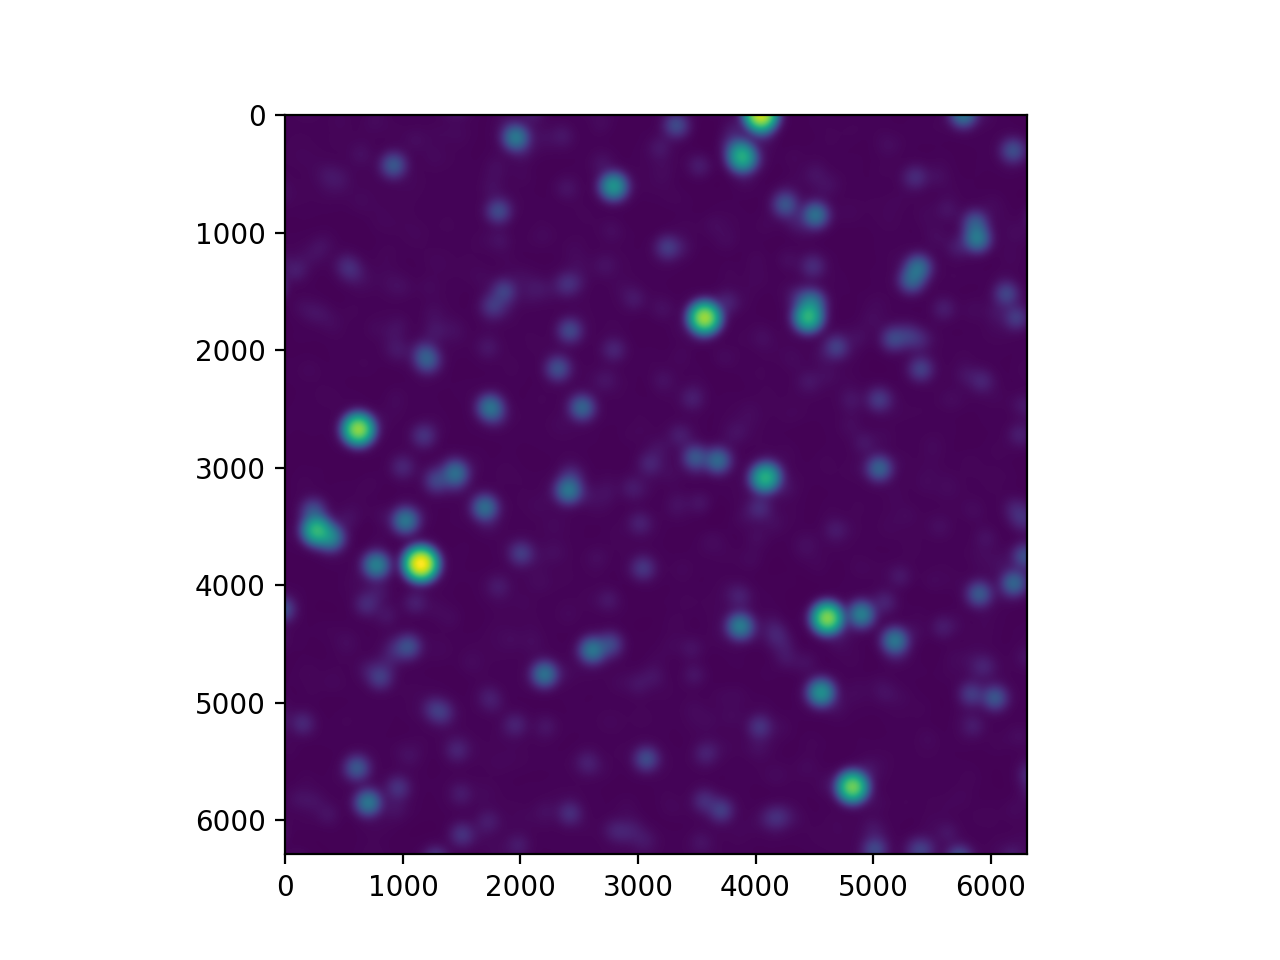

In [56]:
plt.figure()
plt.imshow(test[0].data)


In [39]:
a = mask.masks[0]

In [41]:
a.dtype

dtype('int64')

In [22]:
ps1_file[0]

'../data/ps1_skycell/rings.v3.skycell.2247.041.stk.r.unconv.fits'

In [21]:
sat.ps1.wcs.to_header()

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =              23546.0 / Pixel coordinate of reference point            
CRPIX2  =               6051.0 / Pixel coordinate of reference point            
PC1_1   =                 -1.0 / Coordinate transformation matrix element       
CDELT1  =  6.9444446125999E-05 / [deg] Coordinate increment at reference point  
CDELT2  =  6.9444446125999E-05 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'           / Declination, gnomonic projection               
CRVAL1  =               123.75 / [deg] Coordinate value at reference point      
CRVAL2  =      45.999999999998 / [deg] Coordinate value at reference point      
LONPOLE =                180

In [17]:
sat.ps1.header

SIMPLE  =                    T / Uncompressed file's conforms to FITS           
BITPIX  =                  -32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 6307 / length of original image axis                  
NAXIS2  =                 6289 / length of original image axis                  
CTYPE1  = 'RA---TAN'                                                            
CTYPE2  = 'DEC--TAN'                                                            
CRVAL1  =     123.749999999996                                                  
CRVAL2  =     45.9999999999984                                                  
CRPIX1  =               23546.                                                  
CRPIX2  =                6051.                                                  
CDELT1  = 6.94444461259988E-05                                                  
CDELT2  = 6.94444461259988E-

In [10]:
ps1.header

SIMPLE  =                    T / Uncompressed file's conforms to FITS           
BITPIX  =                  -32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 6307 / length of original image axis                  
NAXIS2  =                 6289 / length of original image axis                  
CTYPE1  = 'RA---TAN'                                                            
CTYPE2  = 'DEC--TAN'                                                            
CRVAL1  =     123.749999999996                                                  
CRVAL2  =     45.9999999999984                                                  
CRPIX1  =               23546.                                                  
CRPIX2  =                6051.                                                  
CDELT1  = 6.94444461259988E-05                                                  
CDELT2  = 6.94444461259988E-

In [ ]:
plt.figure()
plt.imshow(sat.ps1.mask & 1)

In [15]:
ps1 = ps1_data(ps1_file[0])

In [16]:
ps1.data

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan, -0.39088058, -0.93136644, ..., -0.8098211 ,
         0.62343717,         nan],
       [        nan, -0.8098211 ,  0.88299584, ..., -0.93136644,
        -0.31344438,         nan],
       ...,
       [        nan,         nan, -1.6386838 , ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)